#Разведочный анализ данных

Загружаем файлы и необходимые библиотеки

In [ ]:
# Импортируем библиотеки
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno

# Получаем доступ к гугл диску, чтобы взять оттуда данные
drive.mount('/content/drive')

path_transaction = "/content/drive/My Drive/Dataset/transaction.csv"
path_identity = "/content/drive/My Drive/Dataset/identity.csv"

transaction = pd.read_csv(path_transaction)
df_identity = pd.read_csv(path_identity)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Описание таблиц

### Таблица **transaction** содержит 394 признака:

*   **isFraud**: категориальный признак, определяющий транзакцию как мошеннеческую (isFraud=1) или законную (isFraud=0). 
*   **TransactionDT**: timedelta (разница между двумя моментами времени) от заданной эталонной даты и времени.
* **TransactionAMT**: сумма платежа по транзакции в долларах США
* **TransactionAMT**: сумма платежа по транзакции в долларах США
* **ProductCD**: код продукта для каждой транзакции (в т.ч. услуги) - категориальный признак, принимающий одно из значений: W', 'H', 'C', 'S', 'R'.
* **card1 - card6**: категориальный признак - информация о платежной карте, такая как тип карты, категория карты, банк-эмитент, страна и т.д. Фактический смысл скрыт.
* **addr**: категориальный признак, представленный в числовом виде - адрес покупателя:
> * **addr1**: регион выставления счетов
> * **addr2**: страна выставления счетов
* **dist**: расстояние между адресом выставления счетов, почтовым адресом, почтовым индексом, IP-адресом, областью телефона и т.д.
* **P_ и (R__) emaildomain**: категориальные признаки - домен электронной почты покупателя и получателя (некоторым транзакциям не нужен получатель, поэтому R_emaildomain равен null).
* **C1-C14**: различные подсчеты, например, количество адресов, связанных с платежной картой, и т.д. Фактический смысл замаскирован.
* **D1-D15**: timedelta, например количество дней между предыдущей транзакцией и т. д. Фактический смысл скрыт 
* **M1-M9**: категориальные признаки - совпадения, например, имена на карточке, адрес и т. д. Фактический смысл скрыт.
* **V1 - V339**: различные функции, разработанные компанией по безопасности Vesta. Все характеристики Vesta были выведены в числовом виде. Фактический смысл замаскирован.

### Таблица identity, содержит 41 признак:
* **id01-id38**: числовые и категориальные характеристики для идентификации, которые собираются Vesta и партнерами по безопасности. Они включают в себя рейтинг устройства, рейтинг ip_domain, рейтинг прокси, а также поведенческие данные: время входа в учетную запись/время неудачного входа в систему, как долго учетная запись оставалась на странице и т.д. Все они замаскированы ввиду соглашения о безопасности.
* **DeviceType**: категориальный признак - тип устройства, принимает одно из значений: 'mobile' или 'desktop'
* **DeviceInfo**: категориальный признак - информация об устройстве, с которого совершена транзакция.

## Рассмотрим наши данные

Таблица transaction

In [ ]:
transaction

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Таблица identity

In [ ]:
df_identity

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,-15.0,145955.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 66.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,F3111 Build/33.3.A.1.97
144229,3577526,-5.0,172059.0,NaN,NaN,1.0,-5.0,NaN,NaN,NaN,...,chrome 55.0 for android,32.0,855x480,match_status:2,T,F,T,F,mobile,A574BL Build/NMF26F
144230,3577529,-20.0,632381.0,NaN,NaN,-1.0,-36.0,NaN,NaN,NaN,...,chrome 65.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,Moto E (4) Plus Build/NMA26.42-152
144231,3577531,-5.0,55528.0,0.0,0.0,0.0,-7.0,NaN,NaN,0.0,...,chrome 66.0,24.0,2560x1600,match_status:2,T,F,T,F,desktop,MacOS


###Размеры таблиц

* Для файла transaction

In [ ]:
transaction.shape

(590540, 394)

* Для файла identity

In [ ]:
df_identity.shape

(144233, 41)

Вывод: далеко не на все транзакции из файла transaction есть данные из файла identity

###Рассмотрим каждый признак датасета в отдельности и выведем ряд статистик:

Признаки и типы данных:

* Для таблицы transaction

In [ ]:
transaction.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Data columns (total 394 columns):
 #    Column          Dtype  
---   ------          -----  
 0    TransactionID   int64  
 1    isFraud         int64  
 2    TransactionDT   int64  
 3    TransactionAmt  float64
 4    ProductCD       object 
 5    card1           int64  
 6    card2           float64
 7    card3           float64
 8    card4           object 
 9    card5           float64
 10   card6           object 
 11   addr1           float64
 12   addr2           float64
 13   dist1           float64
 14   dist2           float64
 15   P_emaildomain   object 
 16   R_emaildomain   object 
 17   C1              float64
 18   C2              float64
 19   C3              float64
 20   C4              float64
 21   C5              float64
 22   C6              float64
 23   C7              float64
 24   C8              float64
 25   C9              float64
 26   C10             float64
 27   C11         

* Для таблицы identity

In [ ]:
df_identity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionID  144233 non-null  int64  
 1   id_01          144233 non-null  float64
 2   id_02          140872 non-null  float64
 3   id_03          66324 non-null   float64
 4   id_04          66324 non-null   float64
 5   id_05          136865 non-null  float64
 6   id_06          136865 non-null  float64
 7   id_07          5155 non-null    float64
 8   id_08          5155 non-null    float64
 9   id_09          74926 non-null   float64
 10  id_10          74926 non-null   float64
 11  id_11          140978 non-null  float64
 12  id_12          144233 non-null  object 
 13  id_13          127320 non-null  float64
 14  id_14          80044 non-null   float64
 15  id_15          140985 non-null  object 
 16  id_16          129340 non-null  object 
 17  id_17          139369 non-nul

Статистика имеющихся признаков

* Для таблицы transaction

In [ ]:
transaction.describe(include = 'all')

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540,590540.000000,581607.000000,588975.000000,588963,586281.000000,...,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.00000,82351.000000,82351.000000,82351.000000,82351.000000
unique,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,W,NaN,NaN,NaN,visa,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,439670,NaN,NaN,NaN,384767,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,NaN,9898.734658,362.555488,153.194925,NaN,199.278897,...,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
std,1.704744e+05,0.183755,4.617224e+06,239.162522,NaN,4901.170153,157.793246,11.336444,NaN,41.244453,...,4.727971,6217.223583,11169.275702,7955.735482,243.861391,387.62948,274.576920,668.486833,1095.034387,814.946722
min,2.987000e+06,0.000000,8.640000e+04,0.251000,NaN,1000.000000,100.000000,100.000000,NaN,100.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,NaN,6019.000000,214.000000,150.000000,NaN,166.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,NaN,9678.000000,361.000000,150.000000,NaN,226.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,NaN,14184.000000,512.000000,150.000000,NaN,226.000000,...,0.000000,0.000000,25.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


* Для таблицы identity

In [ ]:
df_identity.describe(include=[np.number])

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,1.442330e+05,144233.000000,140872.000000,66324.000000,66324.000000,136865.000000,136865.000000,5155.000000,5155.000000,74926.000000,...,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,4747.000000,5132.000000,5163.000000,77586.000000
mean,3.236329e+06,-10.170502,174716.584708,0.060189,-0.058938,1.615585,-6.698710,13.285354,-38.600388,0.091023,...,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
std,1.788496e+05,14.347949,159651.816856,0.598231,0.701015,5.249856,16.491104,11.384207,26.084899,0.983842,...,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665,2.372447,97.461089,32.101995,3.737502
min,2.987004e+06,-100.000000,1.000000,-13.000000,-28.000000,-72.000000,-100.000000,-46.000000,-100.000000,-36.000000,...,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,3.077142e+06,-10.000000,67992.000000,0.000000,0.000000,0.000000,-6.000000,5.000000,-48.000000,0.000000,...,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.198818e+06,-5.000000,125800.500000,0.000000,0.000000,0.000000,0.000000,14.000000,-34.000000,0.000000,...,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
75%,3.392923e+06,-5.000000,228749.000000,0.000000,0.000000,1.000000,0.000000,22.000000,-23.000000,0.000000,...,225.000000,15.000000,427.000000,533.000000,486.500000,14.000000,15.000000,371.000000,169.000000,32.000000
max,3.577534e+06,0.000000,999595.000000,10.000000,0.000000,52.000000,0.000000,61.000000,0.000000,25.000000,...,229.000000,29.000000,671.000000,661.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000


In [ ]:
df_identity.describe(include=[np.object])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


,id_12,id_15,id_16,id_23,id_27,id_28,id_29,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
count,144233,140985,129340,5169,5169,140978,140978,77565,140282,73289,77805,140985,140985,140985,140985,140810,118666
unique,2,3,2,3,2,2,2,75,130,260,4,2,2,2,2,2,1786
top,NotFound,Found,Found,IP_PROXY:TRANSPARENT,Found,Found,Found,Windows 10,chrome 63.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
freq,123025,67728,66324,3489,5155,76232,74926,21155,22000,16874,60011,77814,134066,110452,73922,85165,47722


Также можем оценить количество уникальных значений в таблице identity:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


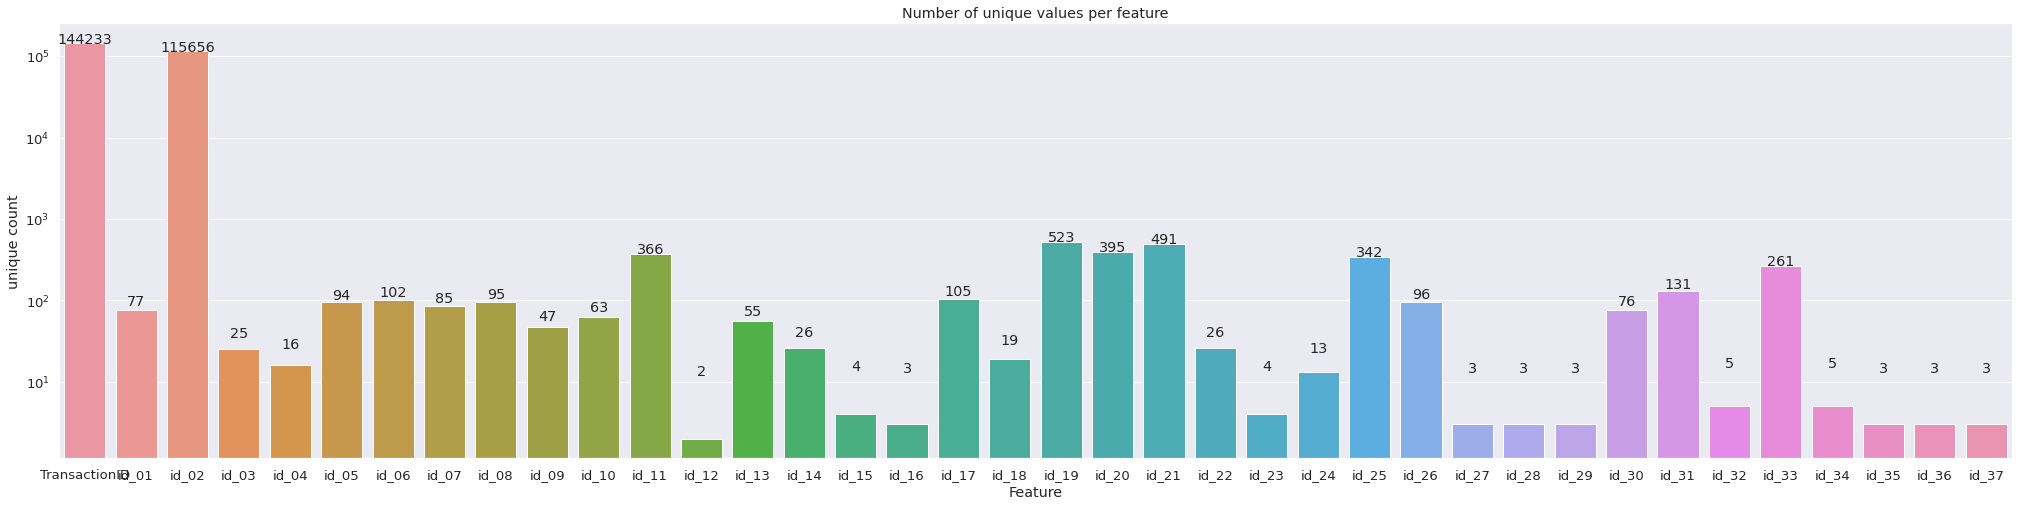

In [ ]:
plt.figure(figsize=(35, 8))
features = list(df_identity.columns[0:38])
uniques = [len(df_identity[col].unique()) for col in features]
sns.set(font_scale=1.2)
ax = sns.barplot(features, uniques, log=True)
ax.set(xlabel='Feature', ylabel='unique count', title='Number of unique values per feature')
for p, uniq in zip(ax.patches, uniques):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            uniq,
            ha="center") 

Признак id_02 имеет наибольшее количество уникальных значений(не считая transactionID)

Проверим наличие дубликатов в данных

* Для файла transaction

In [ ]:
dup = transaction.duplicated()
dup.value_counts()

False    590540
dtype: int64

* Для файла identity

In [ ]:
df_identity[df_identity.duplicated()]

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo


Вывод: дубликаты отсутствуют

## Пропущенные значения в таблицах

###Для таблицы transaction

Посчитаем процент отсутствующих значения для каждого параметра:

In [ ]:
percent_of_missing_value = transaction.isnull().sum() * 100 / len(transaction)
missing_value = pd.DataFrame({'percentage of missing values': percent_of_missing_value})
missing_value

,percentage of missing values
TransactionID,0.000000
isFraud,0.000000
TransactionDT,0.000000
TransactionAmt,0.000000
ProductCD,0.000000
...,...
V335,86.054967
V336,86.054967
V337,86.054967
V338,86.054967


Выведем те признаки, процент пропущенных значений которых превышает 70%:

In [ ]:
persentage = missing_value['percentage of missing values']
highly_miss = persentage[persentage > 70]
highly_miss

dist2            93.628374
R_emaildomain    76.751617
D6               87.606767
D7               93.409930
D8               87.312290
                   ...    
V335             86.054967
V336             86.054967
V337             86.054967
V338             86.054967
V339             86.054967
Name: percentage of missing values, Length: 168, dtype: float64

Посмотрим количество признаков с большим процентом пропущенных значений:

In [ ]:
len(highly_miss)

168

Удалим признаки в большим количеством пропусков:

In [ ]:
transaction = transaction.drop(highly_miss.index, axis=1)
transaction

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,0.0,0.000000,0.000000,0.000000,0.0,117.0,0.0,0.000000,0.000000,0.000000
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,135.0,0.000000,0.000000,0.000000,50.0,1404.0,790.0,0.000000,0.000000,0.000000
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,0.0,47.950001,47.950001,47.950001,0.0,0.0,0.0,0.000000,0.000000,0.000000
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,117.0,317.500000,669.500000,317.500000,0.0,2234.0,0.0,0.000000,0.000000,0.000000


###Для таблицы identity

Отобразим недостающие данные в виде гистограммы:

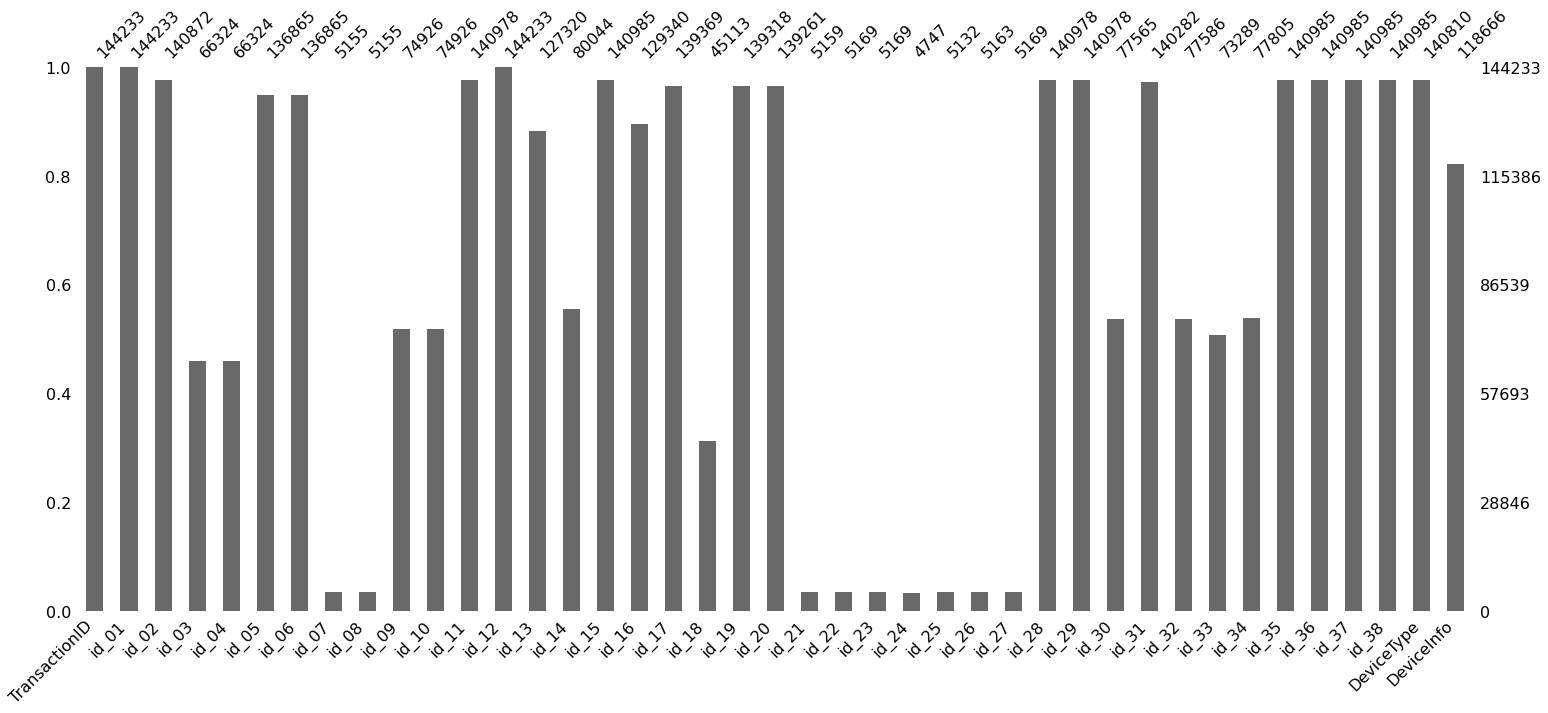

In [ ]:
msno.bar(df_identity)

Стоит помнить, что в случае, если пропусков у признака слишком много (более 70%), такой признак обычно удаляют. У нас их достаточное количество,удалим все эти столбцы

In [ ]:
df_identity.isnull().mean() * 100

TransactionID     0.000000
id_01             0.000000
id_02             2.330257
id_03            54.016071
id_04            54.016071
id_05             5.108401
id_06             5.108401
id_07            96.425922
id_08            96.425922
id_09            48.052110
id_10            48.052110
id_11             2.256765
id_12             0.000000
id_13            11.726165
id_14            44.503685
id_15             2.251912
id_16            10.325654
id_17             3.372321
id_18            68.722137
id_19             3.407681
id_20             3.447200
id_21            96.423149
id_22            96.416215
id_23            96.416215
id_24            96.708798
id_25            96.441868
id_26            96.420375
id_27            96.416215
id_28             2.256765
id_29             2.256765
id_30            46.222432
id_31             2.739318
id_32            46.207872
id_33            49.187079
id_34            46.056034
id_35             2.251912
id_36             2.251912
i

In [ ]:
df_identity = df_identity.drop(columns=['id_07', 'id_08', 'id_21', 'id_22','id_23', 'id_24', 'id_25', 'id_26', 'id_27'])
df_identity

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_09,id_10,id_11,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,100.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,100.0,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,100.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,0.0,0.0,100.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,3577521,-15.0,145955.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,...,chrome 66.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,F3111 Build/33.3.A.1.97
144229,3577526,-5.0,172059.0,NaN,NaN,1.0,-5.0,NaN,NaN,100.0,...,chrome 55.0 for android,32.0,855x480,match_status:2,T,F,T,F,mobile,A574BL Build/NMF26F
144230,3577529,-20.0,632381.0,NaN,NaN,-1.0,-36.0,NaN,NaN,100.0,...,chrome 65.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,Moto E (4) Plus Build/NMA26.42-152
144231,3577531,-5.0,55528.0,0.0,0.0,0.0,-7.0,0.0,0.0,100.0,...,chrome 66.0,24.0,2560x1600,match_status:2,T,F,T,F,desktop,MacOS


Выведем процент пропусков оставшихся признаков

In [ ]:
df_identity.isnull().mean() * 100

TransactionID     0.000000
id_01             0.000000
id_02             2.330257
id_03            54.016071
id_04            54.016071
id_05             5.108401
id_06             5.108401
id_09            48.052110
id_10            48.052110
id_11             2.256765
id_12             0.000000
id_13            11.726165
id_14            44.503685
id_15             2.251912
id_16            10.325654
id_17             3.372321
id_18            68.722137
id_19             3.407681
id_20             3.447200
id_28             2.256765
id_29             2.256765
id_30            46.222432
id_31             2.739318
id_32            46.207872
id_33            49.187079
id_34            46.056034
id_35             2.251912
id_36             2.251912
id_37             2.251912
id_38             2.251912
DeviceType        2.373243
DeviceInfo       17.726179
dtype: float64

И построим для них гистограмму

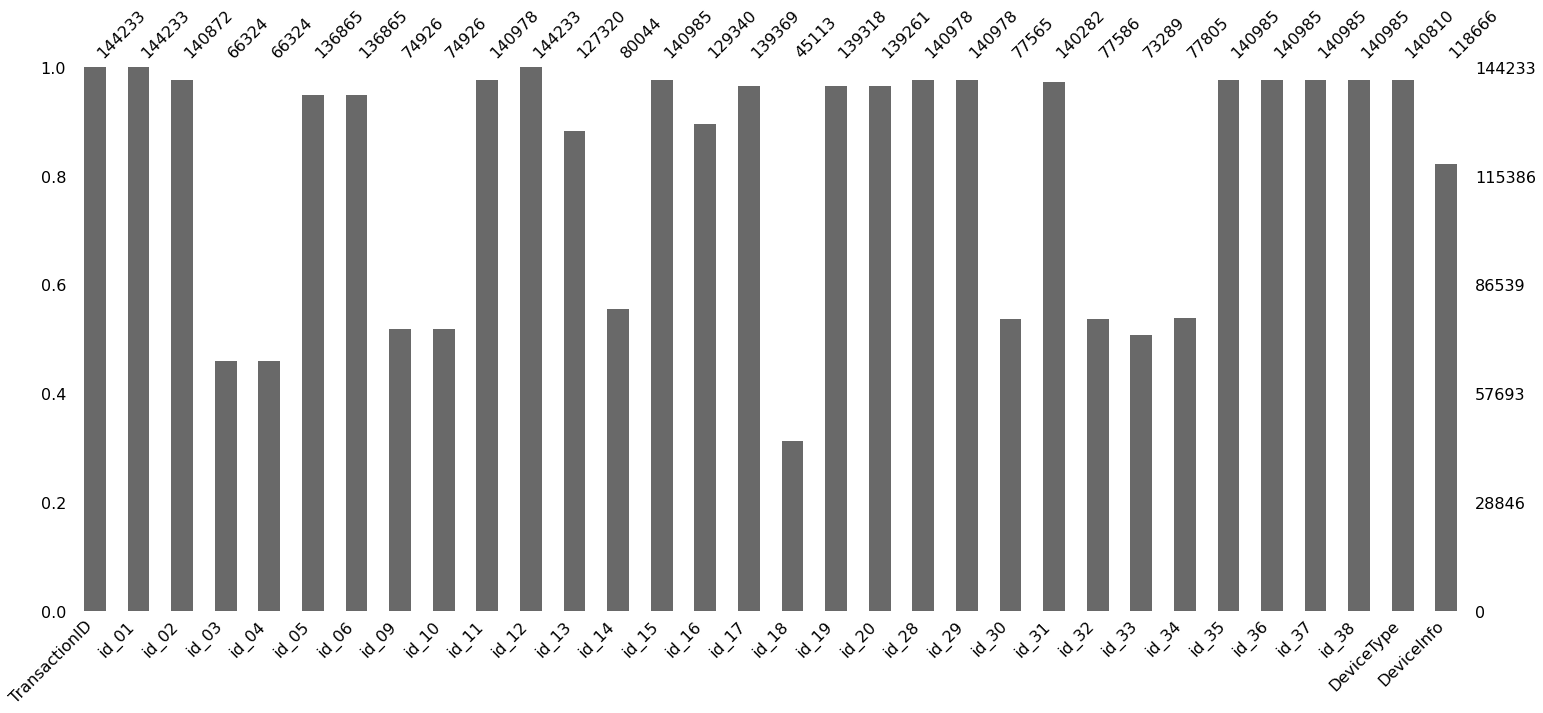

In [ ]:
msno.bar(df_identity)

Вывод: данные содержат большое количество пропущенных значений. Это может означать, либо то, что часть информации не была собрана, либо то, что она не была отражена в выгрузке корректно.

### Объединенные таблицы

In [ ]:
merge_df = pd.merge(transaction, df_identity, on= 'TransactionID', how = 'left')

In [ ]:
data=pd.DataFrame(merge_df.isnull().sum()/len(merge_df)*100).reset_index().rename(columns={'index':'column_name',0:'percent'})
null_df = data.sort_values(by='percent', ascending=False)

In [ ]:
pd.options.display.max_colwidth = 300
null_df=null_df.groupby('percent')['column_name'].unique().reset_index().sort_values(by='percent',ascending=False)

In [ ]:
null_df[null_df['percent']>=75]

,percent,column_name
49,92.360721,[id_18]
48,88.768923,"[id_04, id_03]"
47,87.589494,[id_33]
46,87.312290,"[id_09, id_10]"
45,86.865411,[id_30]
44,86.861855,[id_32]
43,86.824771,[id_34]
42,86.445626,[id_14]
41,79.905510,[DeviceInfo]
40,78.440072,[id_13]


In [ ]:
null_df[null_df['percent']<=75]

,percent,column_name
28,59.652352,[dist1]
27,59.349409,[M5]
26,58.635317,[M7]
25,58.633115,"[M9, M8]"
24,52.467403,[D5]
23,47.658753,[M4]
22,47.549192,[D2]
21,47.293494,"[V5, V6, V7, V3, V8, V9, V10, V11, V4, V2, V1, D11]"
20,45.907136,"[M3, M2, M1]"
19,44.514851,[D3]


Вывод: при таком способе объединения файлов, становится много пропусков в признаках из таблицы identity

## Проверяем наличие выбросов

### Для таблицы transaction

Возьмем 20 рандомных признаков и нарисуем для них графики boxplot:

In [ ]:
random_features = np.random.randint(len(transaction.columns), size=20)

Boxplot cannot be plotted for M9 feature


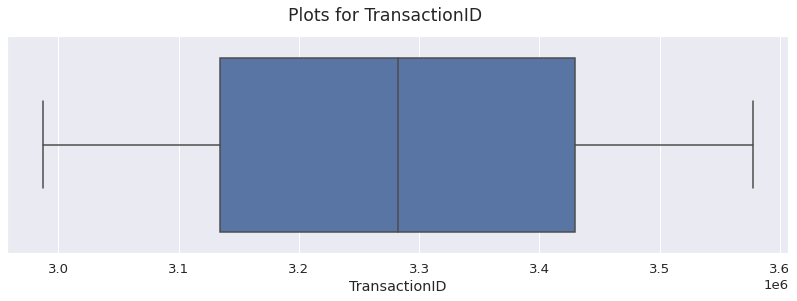

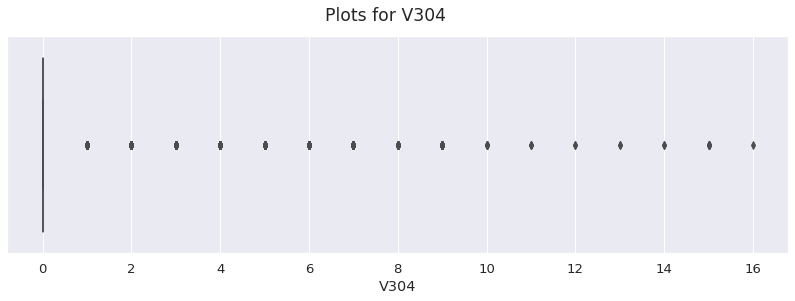

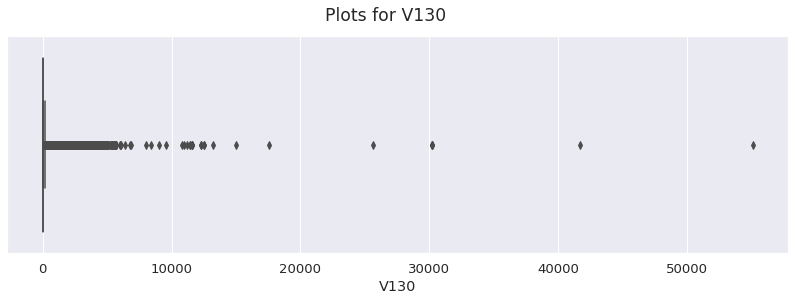

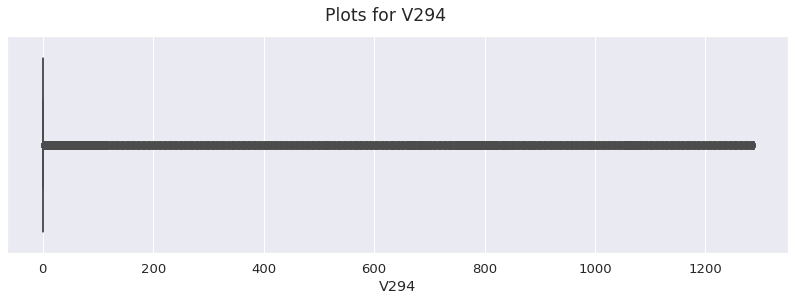

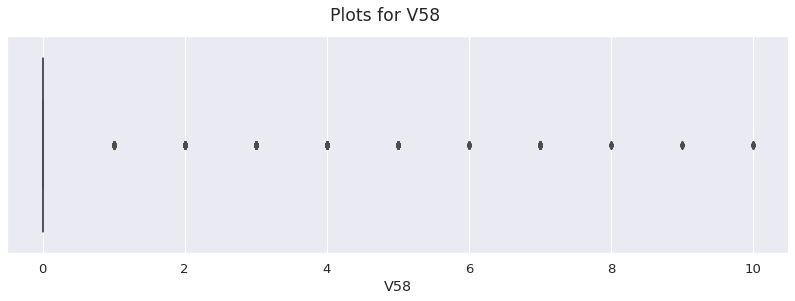

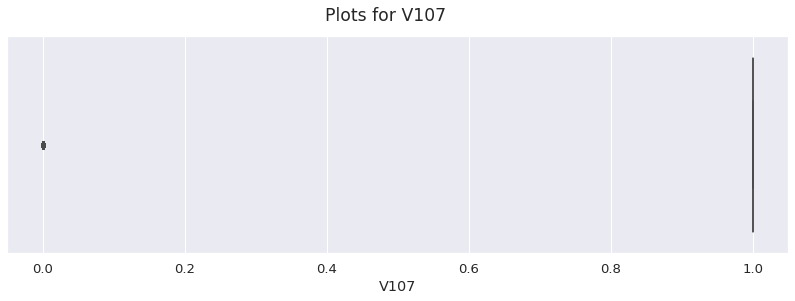

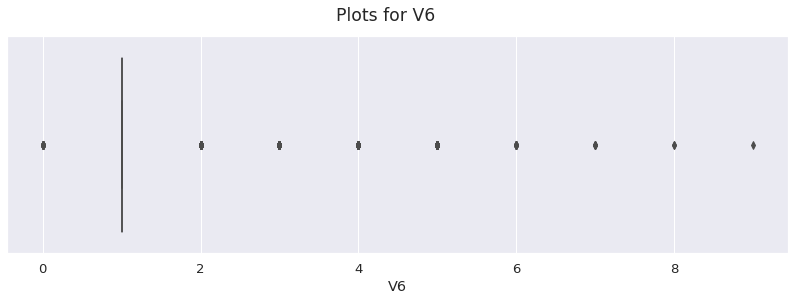

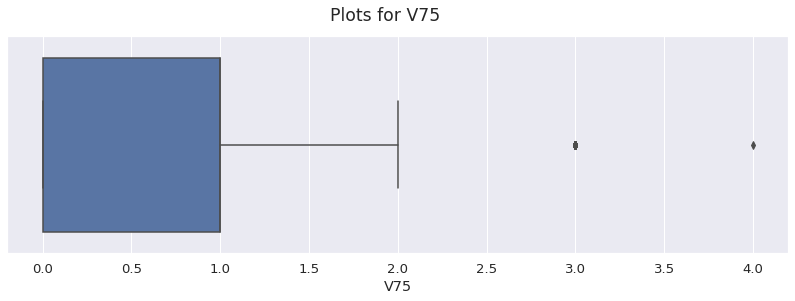

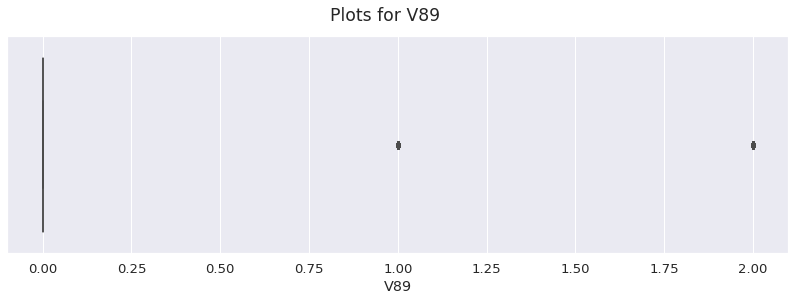

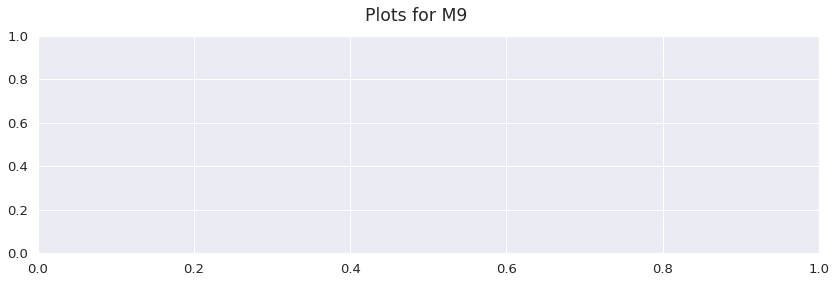

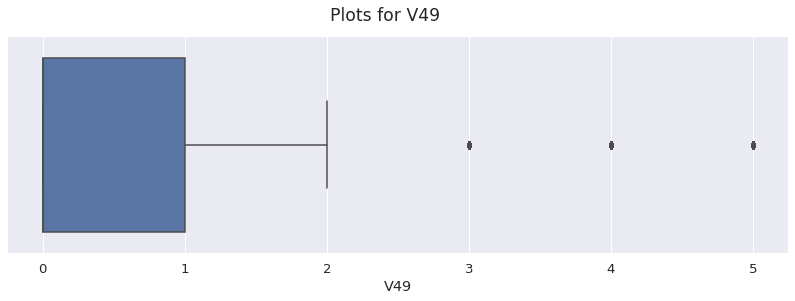

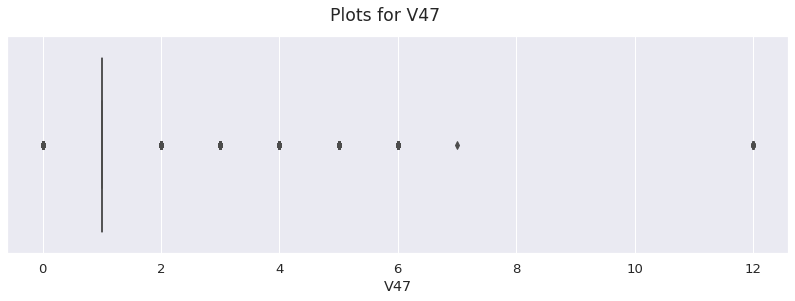

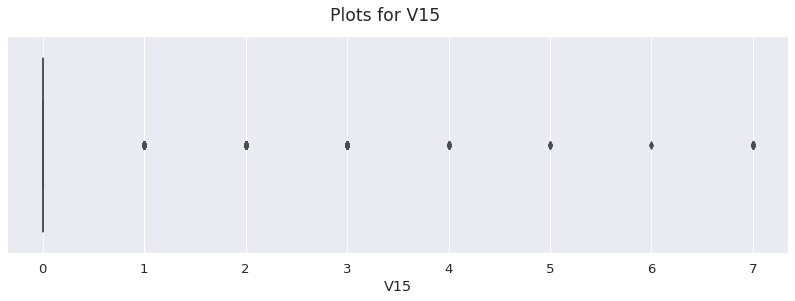

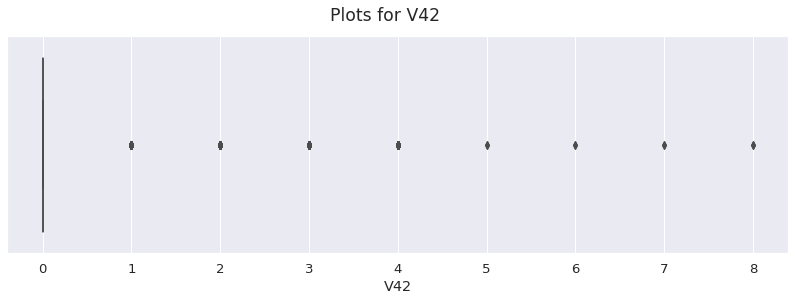

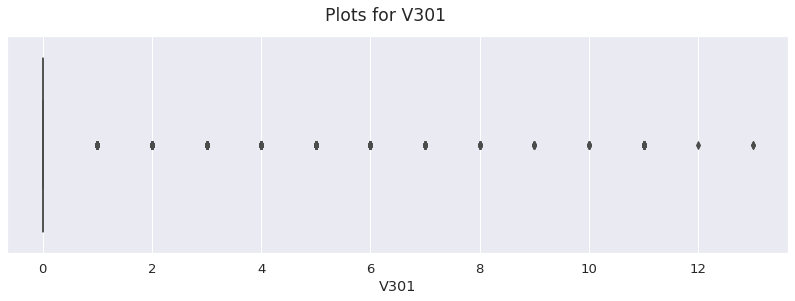

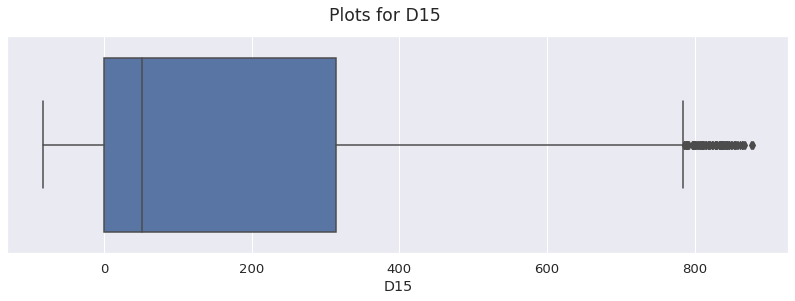

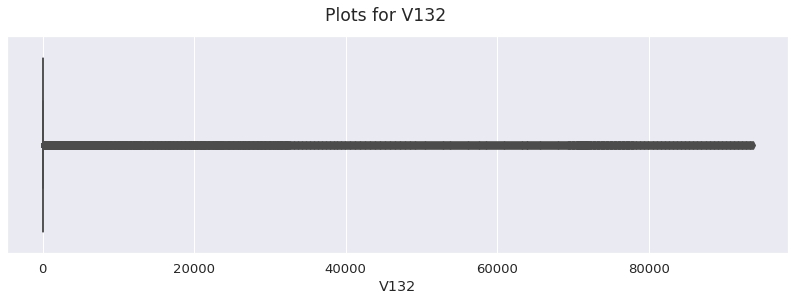

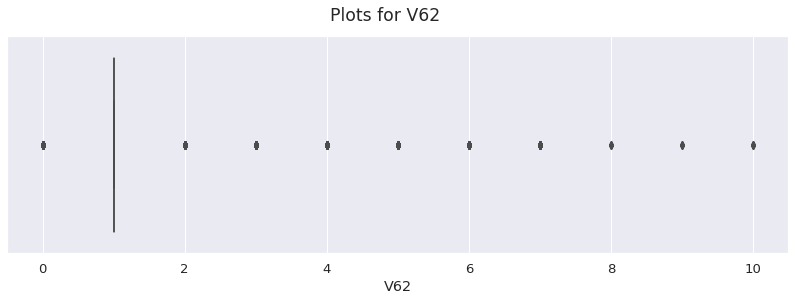

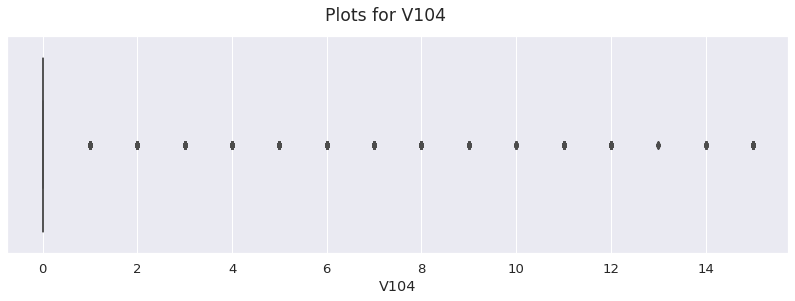

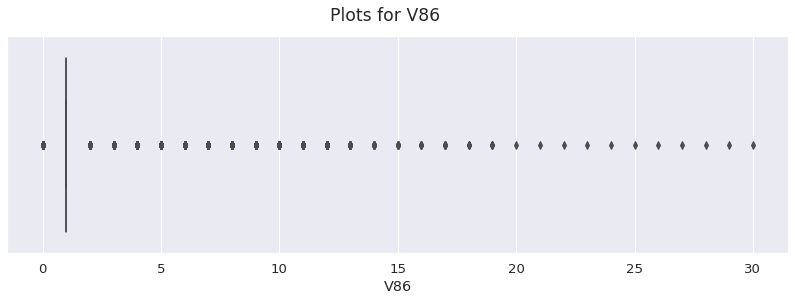

In [ ]:
for col in transaction.columns[random_features]:  
    try:
      fig, ax1  =  plt.subplots(ncols = 1, figsize = (14,4));
      fig.suptitle('Plots for {}'.format(col));

      sns.boxplot(x = col , data = transaction, ax = ax1);
    except:
      print(f'Boxplot cannot be plotted for {col} feature')
      continue

### Для таблицы identity

Найдем аномалии с помощью построения гистограммы распределения и ящика с усами для каждой числовой переменной

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

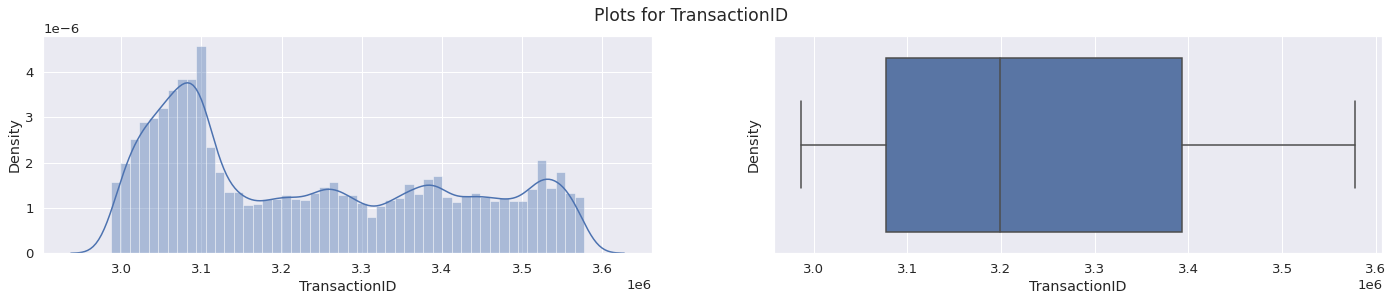

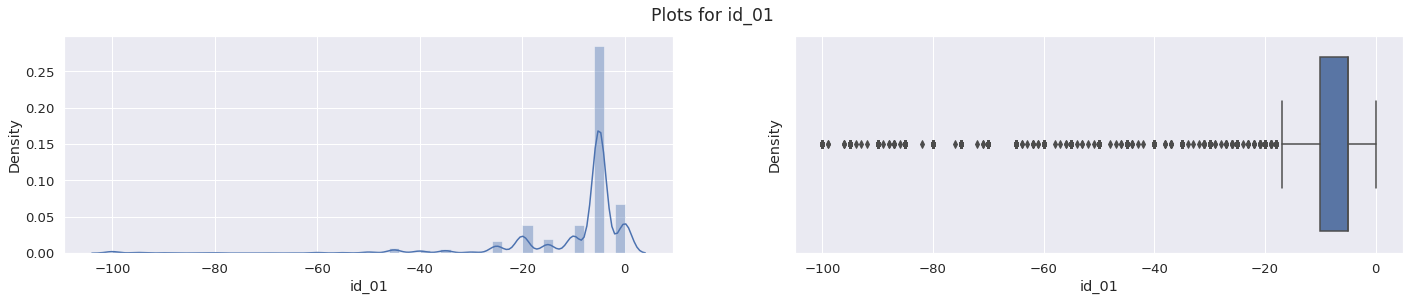

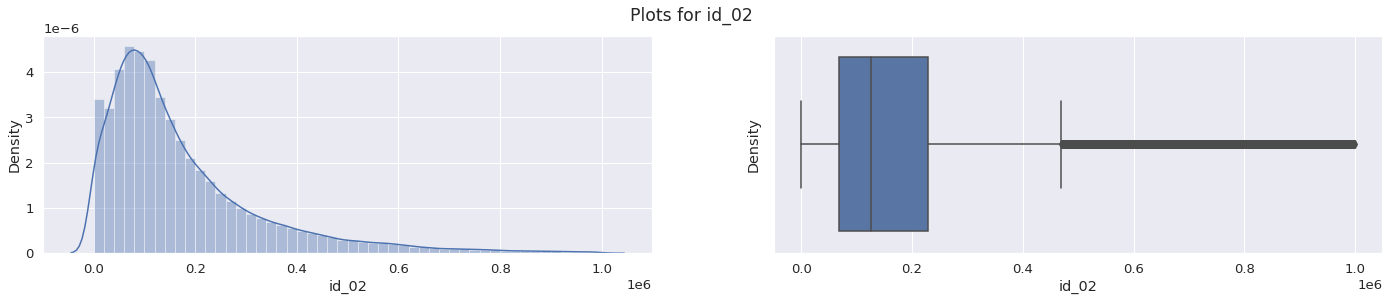

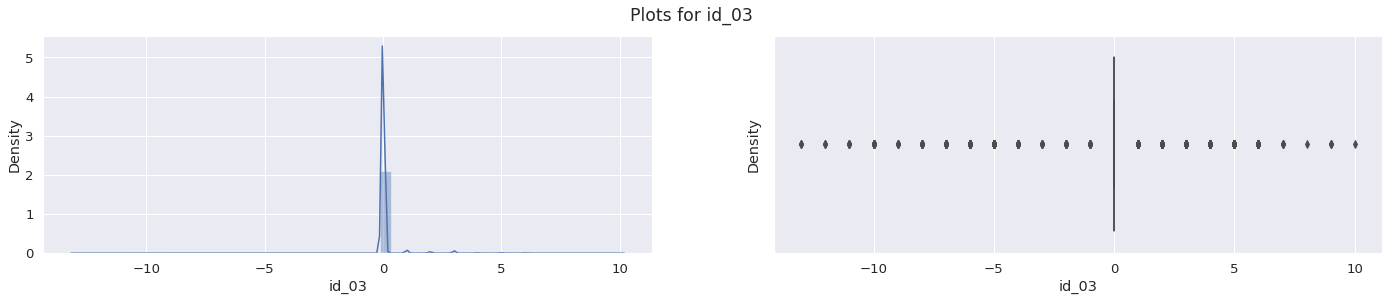

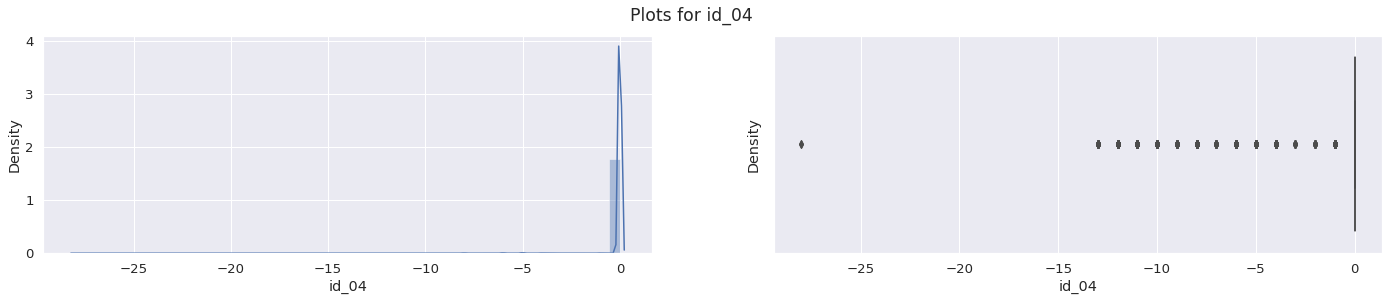

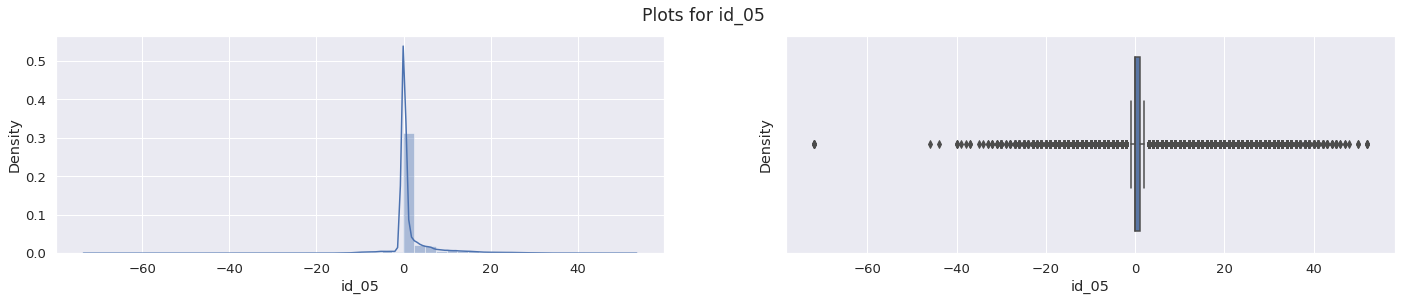

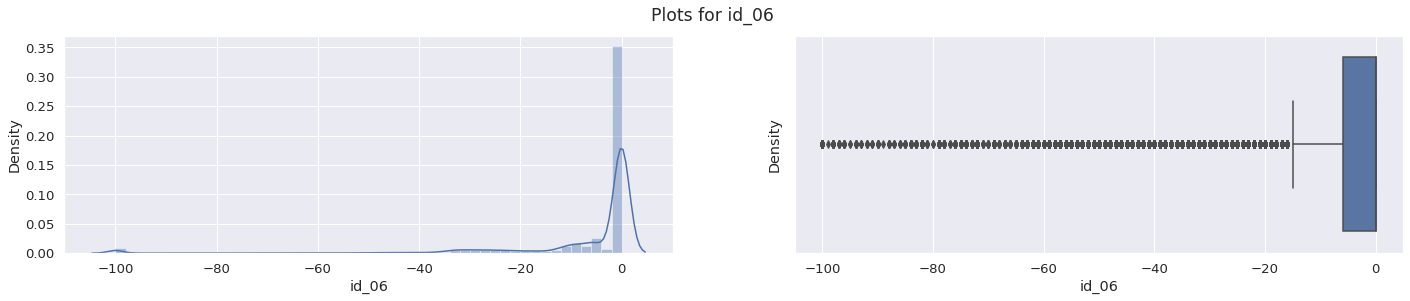

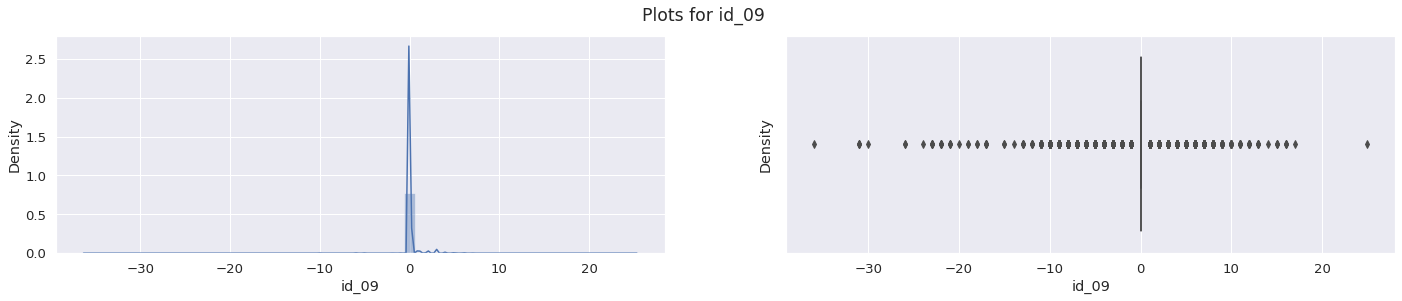

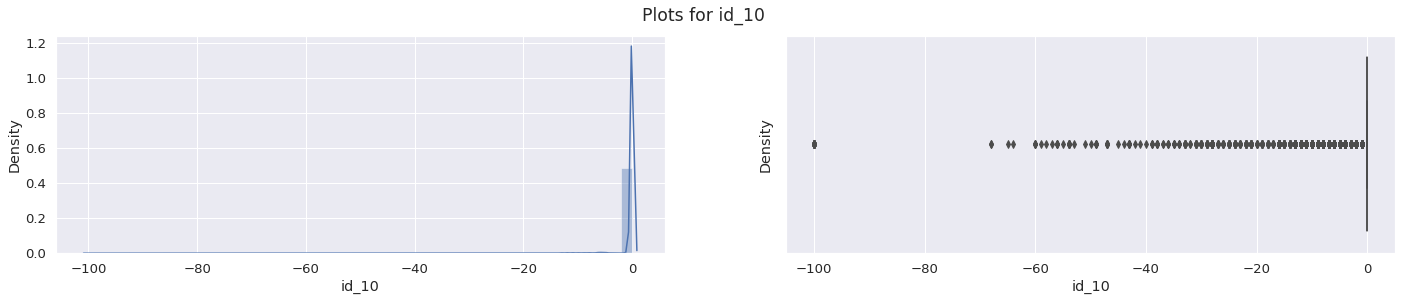

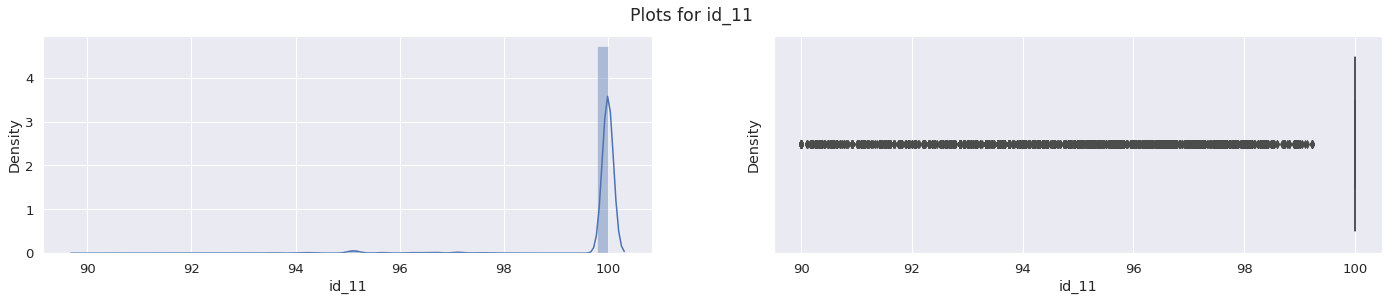

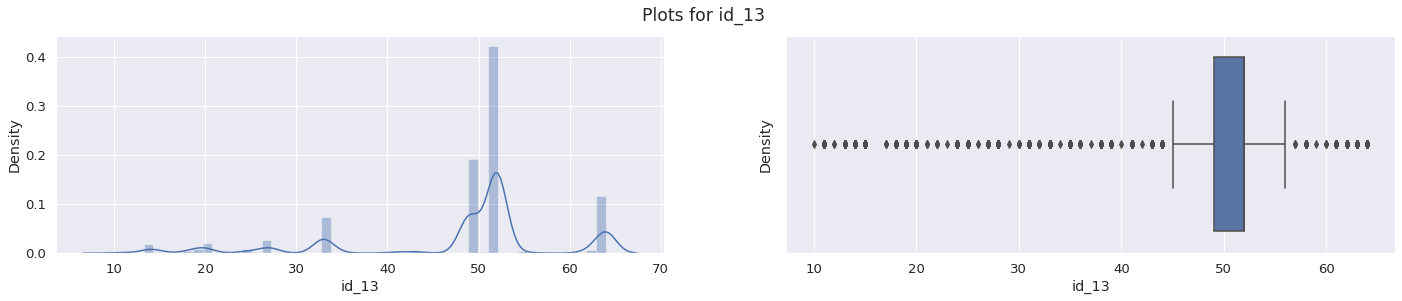

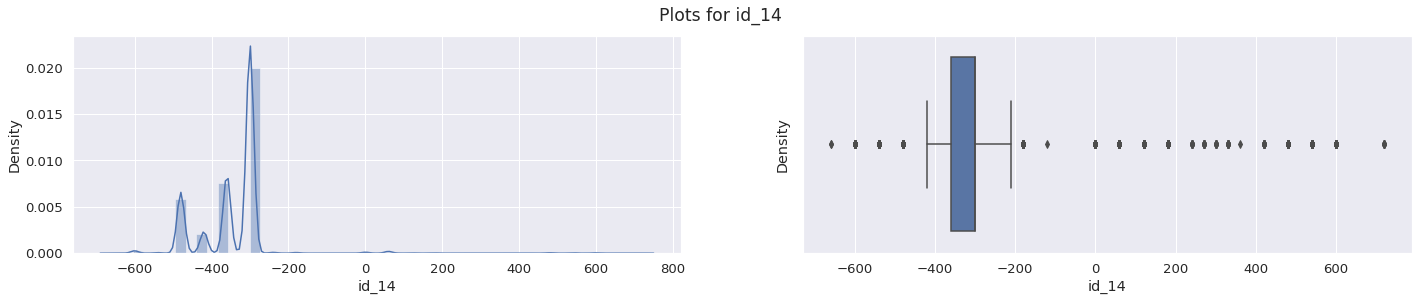

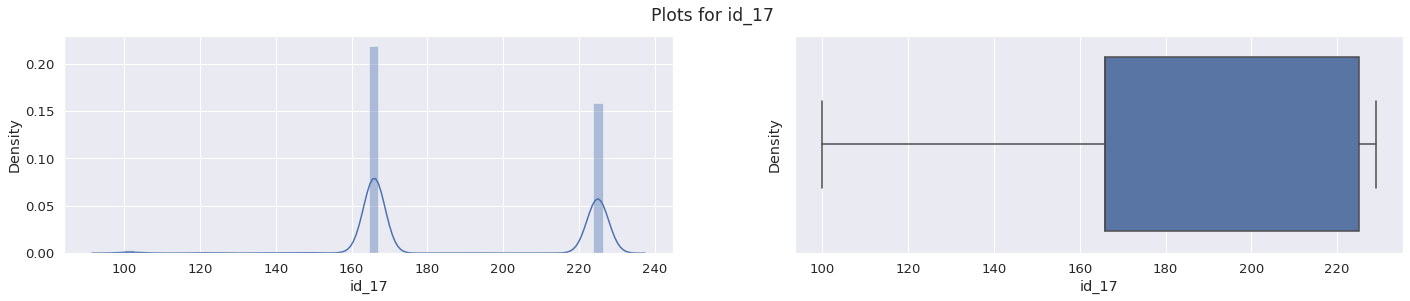

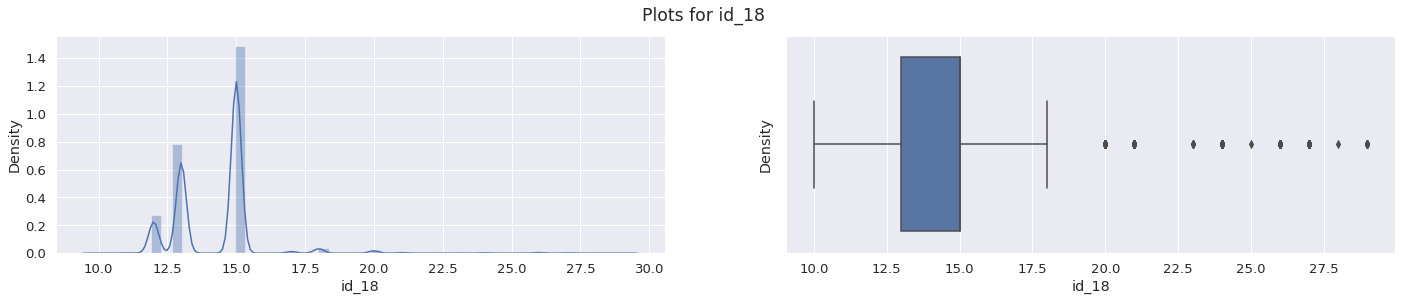

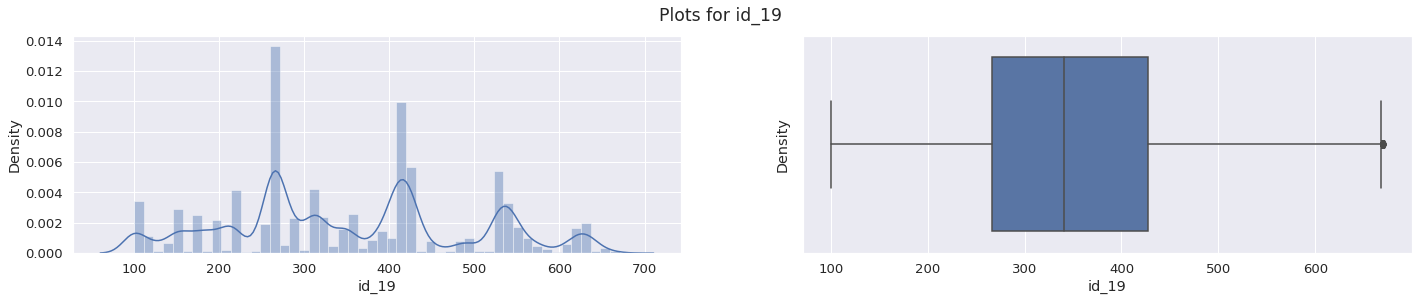

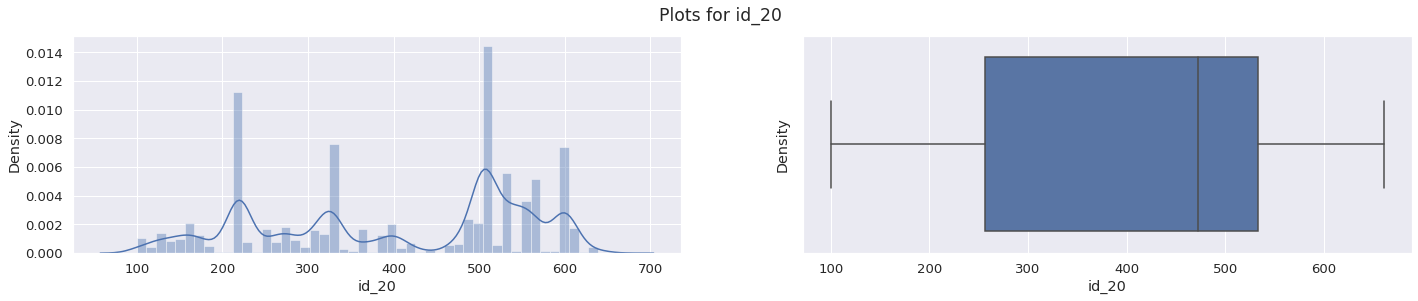

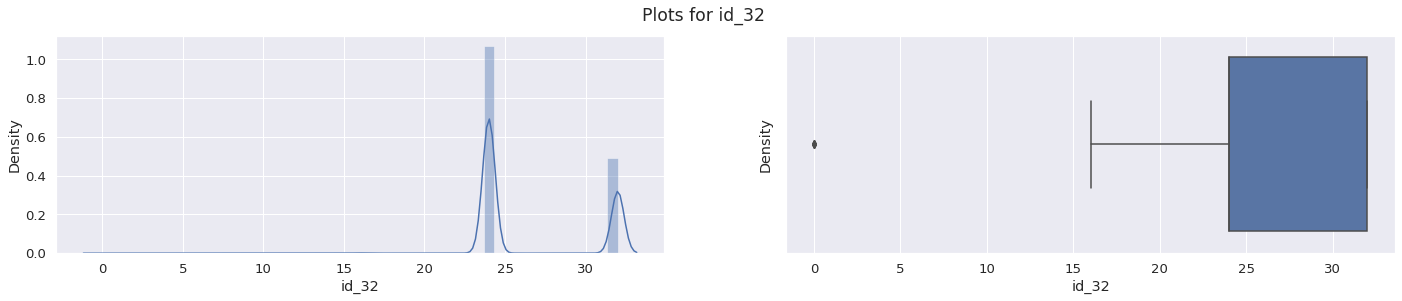

In [ ]:
for col in df_identity.select_dtypes(include='number').columns.tolist():  
    fig, (ax1, ax2)  =  plt.subplots(ncols = 2, figsize = (24,4))
    fig.suptitle('Plots for {}'.format(col))
    
    # график распределения
    sns.distplot(df_identity[col], color = 'b',  kde = True ,  ax = ax1 )
    plt.ylabel('Density')
    
    # ящик с усами
    sns.boxplot(x = col , data = df_identity,ax = ax2)

Вывод: у очень многих признаков имеются выбросы

## Посмотрим на распределение некоторых признаков относительно признака isFraud

###Для таблицы transaction

Рассмотрим типы карт и частоту их использования в мошеннеческих и законных трнзакциях (признаки - card4 и card6)

* Платежная система (признак card4):

In [ ]:
transaction['card4'].value_counts()

visa                384767
mastercard          189217
american express      8328
discover              6651
Name: card4, dtype: int64

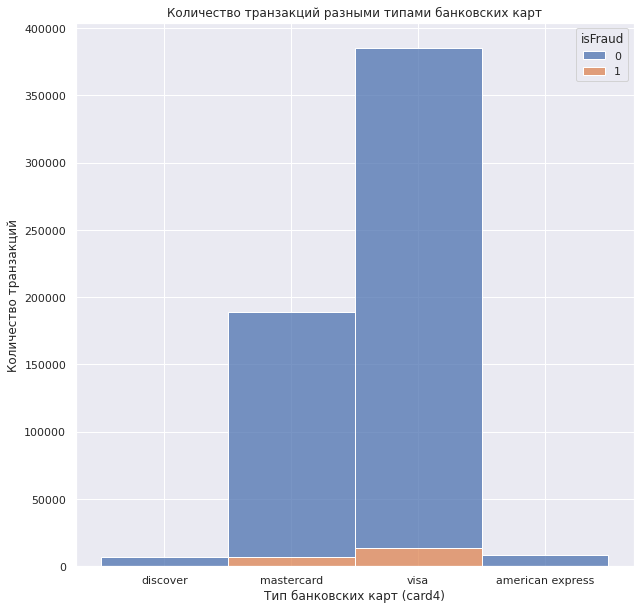

In [ ]:
sns.set(rc={'figure.figsize':(10, 10)})
sns.histplot(data=transaction, x='card4', hue='isFraud', multiple="stack").set(xlabel='Тип банковских карт (card4)', 
                                               ylabel='Количество транзакций', 
                                               title='Количество транзакций разными типами банковских карт');

* Тип банковской карты (признак card4):

In [ ]:
transaction['card6'].value_counts()

debit              439938
credit             148986
debit or credit        30
charge card            15
Name: card6, dtype: int64

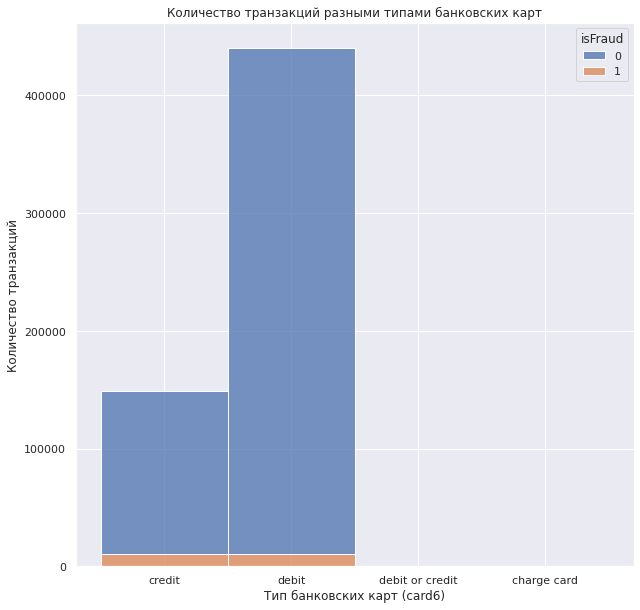

In [ ]:
sns.set(rc={'figure.figsize':(10, 10)})
sns.histplot(data=transaction, x='card6', hue='isFraud', multiple="stack").set(xlabel='Тип банковских карт (card6)', 
                                               ylabel='Количество транзакций', 
                                               title='Количество транзакций разными типами банковских карт');



Можем оценить ниаболее часто приобретаемый продукт для законных и мошеннеческих транзакций (признак ProductCD содержит 4 категории (W, C, R, H, S), соответствующие коду продукта):


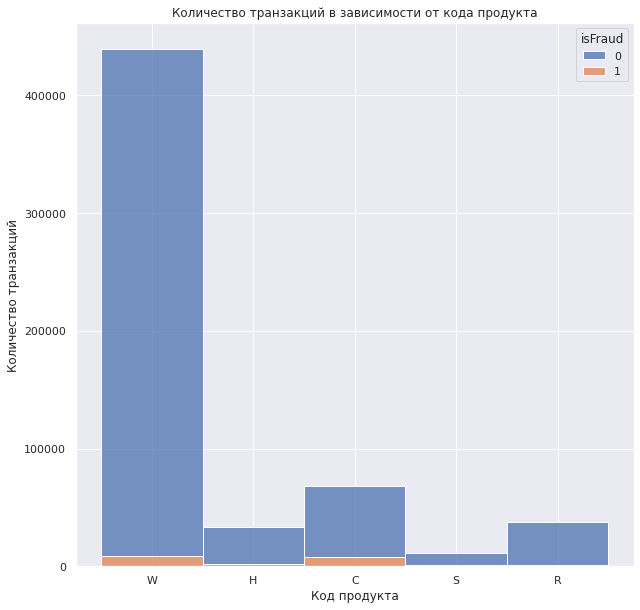

In [ ]:
sns.set(rc={'figure.figsize':(10, 10)})
sns.histplot(data=transaction, x='ProductCD', hue='isFraud', multiple="stack").set(xlabel='Код продукта', 
                                               ylabel='Количество транзакций', 
                                               title='Количество транзакций в зависимости от кода продукта');

Рассмотрим распределение сумм транзакций (TransactionAMT):

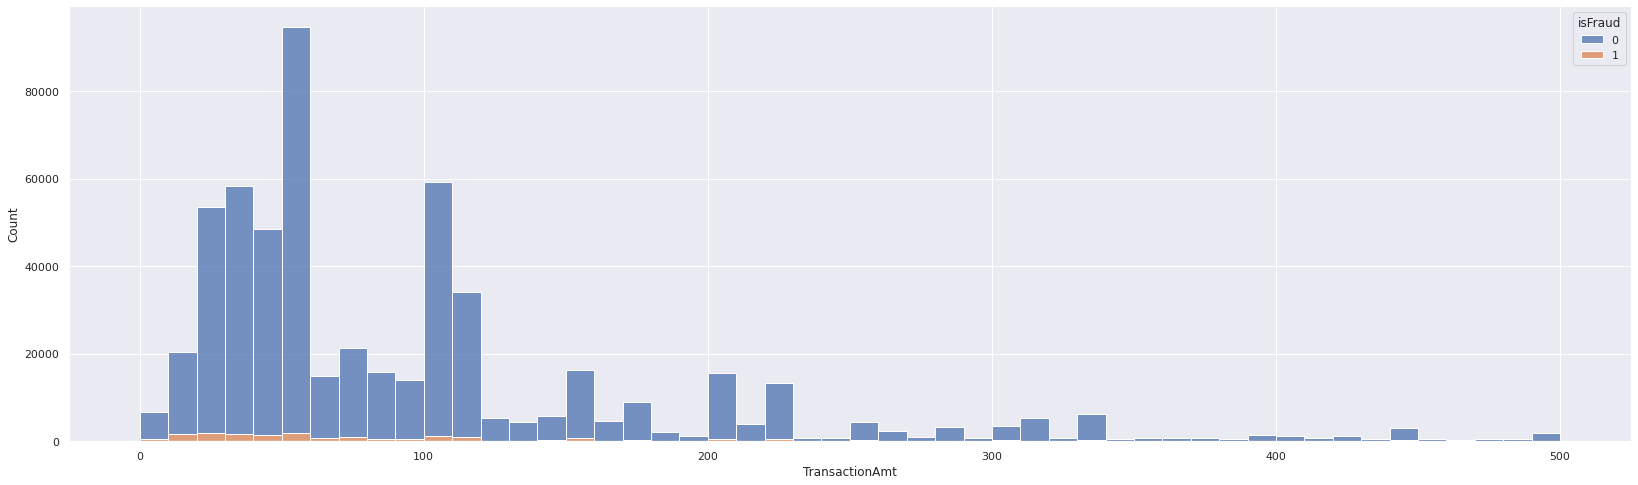

In [ ]:
sns.set(rc={'figure.figsize':(28,8)})

sns.histplot(data=transaction, x = 'TransactionAmt', binwidth=10, binrange=(0,500), hue='isFraud', multiple="stack")

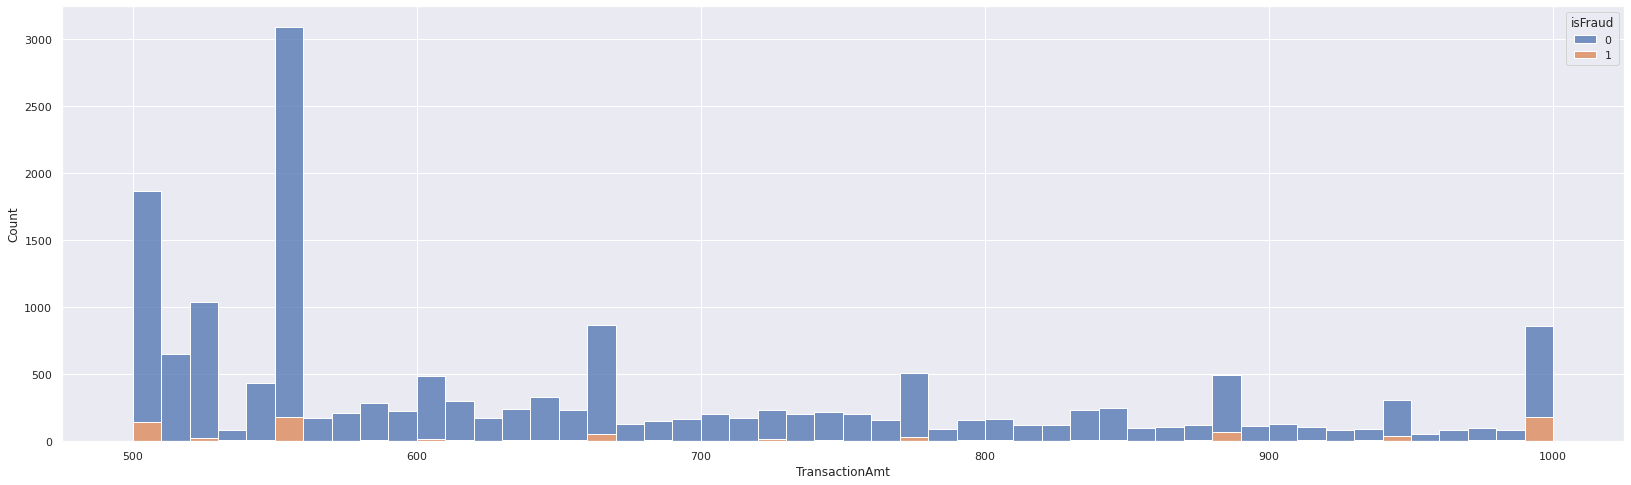

In [ ]:
sns.set(rc={'figure.figsize':(28,8)})

sns.histplot(data=transaction, x = 'TransactionAmt', binwidth=10, binrange=(500,1000), hue='isFraud', multiple="stack")

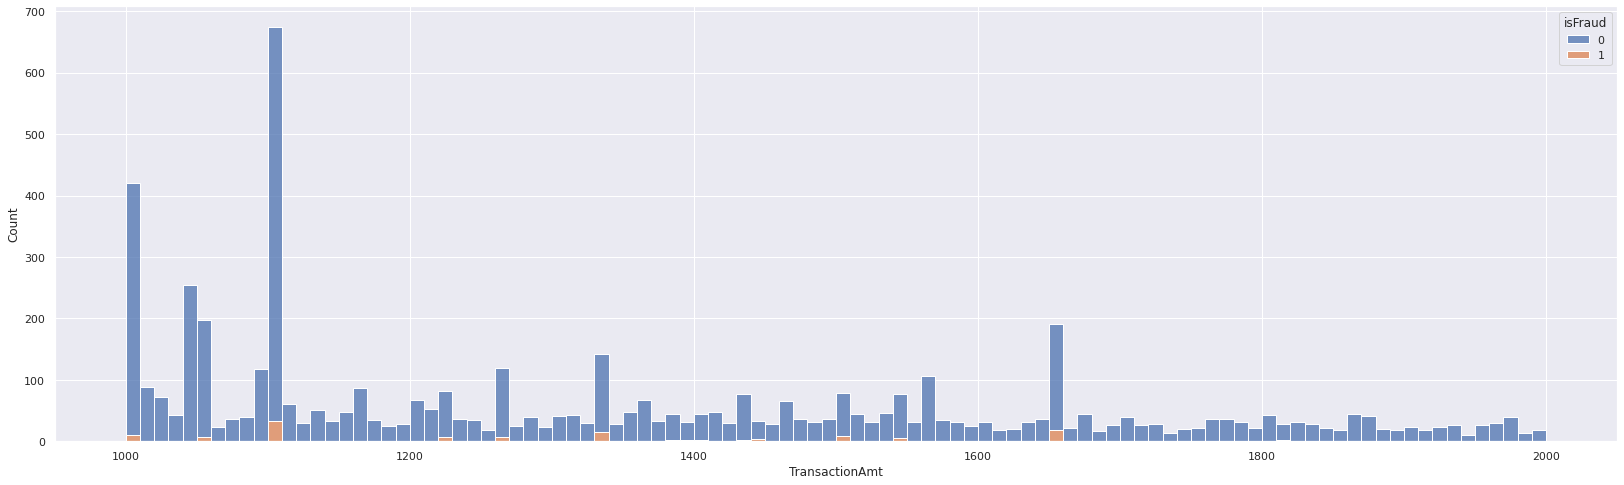

In [ ]:
sns.set(rc={'figure.figsize':(28,8)})

sns.histplot(data=transaction, x = 'TransactionAmt', binwidth=10, binrange=(1000,2000), hue='isFraud', multiple="stack")

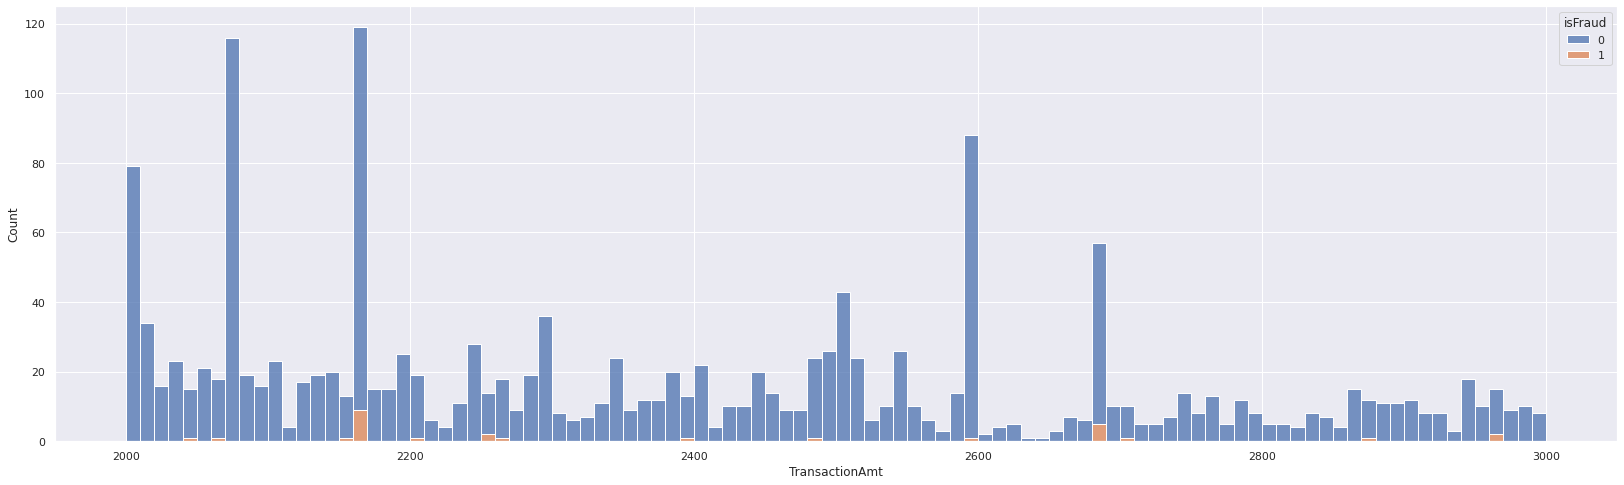

In [ ]:
sns.set(rc={'figure.figsize':(28,8)})

sns.histplot(data=transaction, x = 'TransactionAmt', binwidth=10, binrange=(2000,3000), hue='isFraud', multiple="stack")

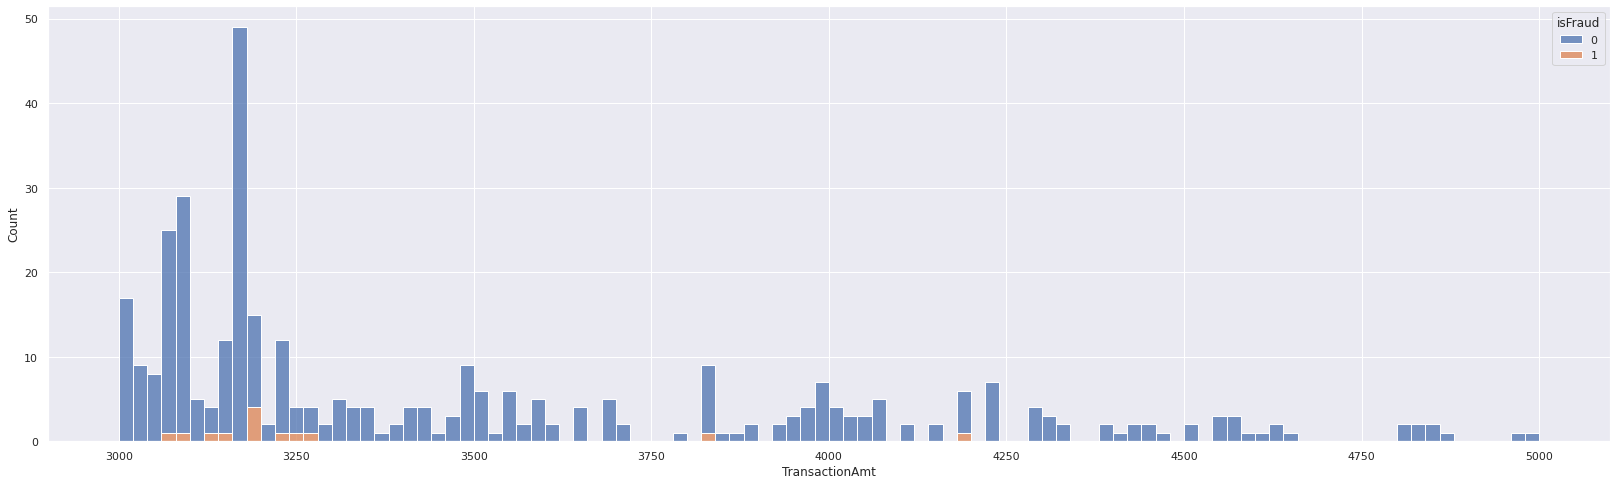

In [ ]:
sns.set(rc={'figure.figsize':(28,8)})

sns.histplot(data=transaction, x = 'TransactionAmt', binwidth=20, binrange=(3000,5000), hue='isFraud', multiple="stack")

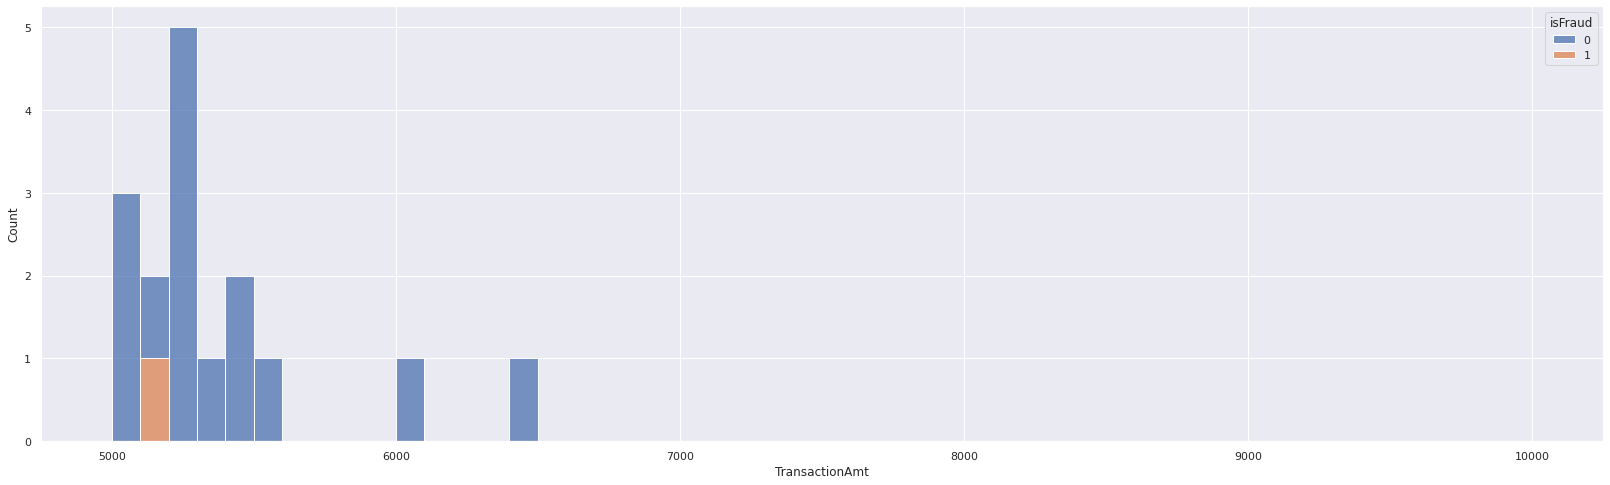

In [ ]:
sns.set(rc={'figure.figsize':(28,8)})

sns.histplot(data=transaction, x = 'TransactionAmt', binwidth=100, binrange=(5000,10000), hue='isFraud', multiple="stack")

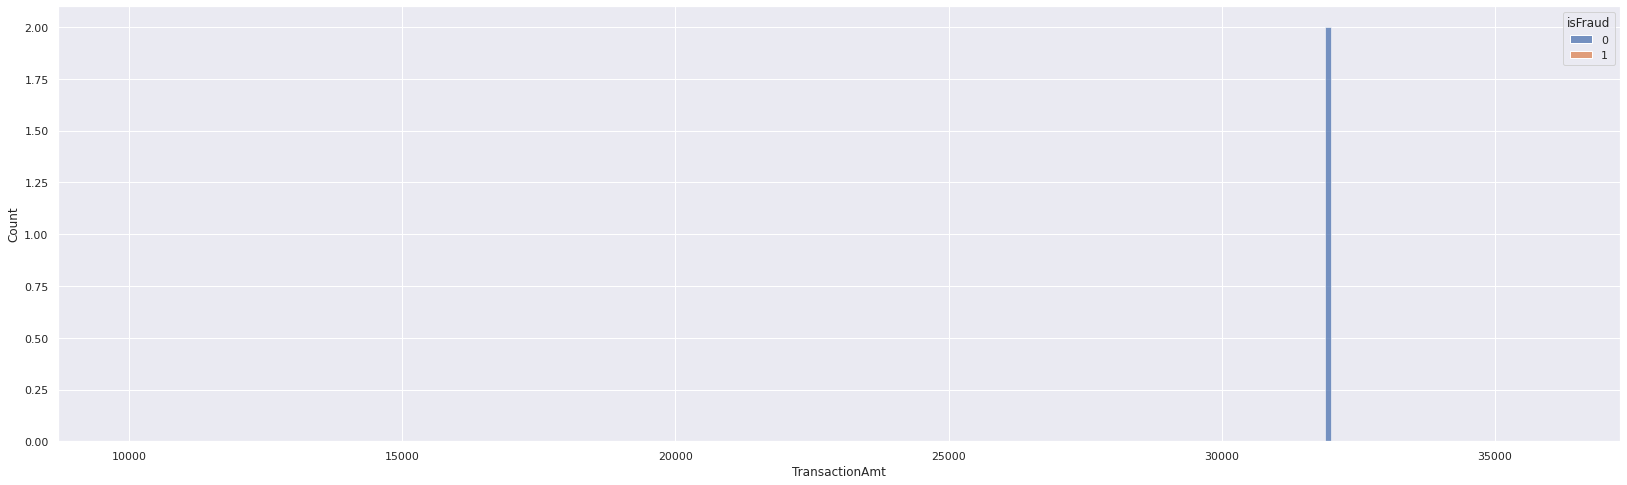

In [ ]:
sns.set(rc={'figure.figsize':(28,8)})

sns.histplot(data=transaction, x = 'TransactionAmt', binwidth=100, binrange=(10000,36000), hue='isFraud', multiple="stack")

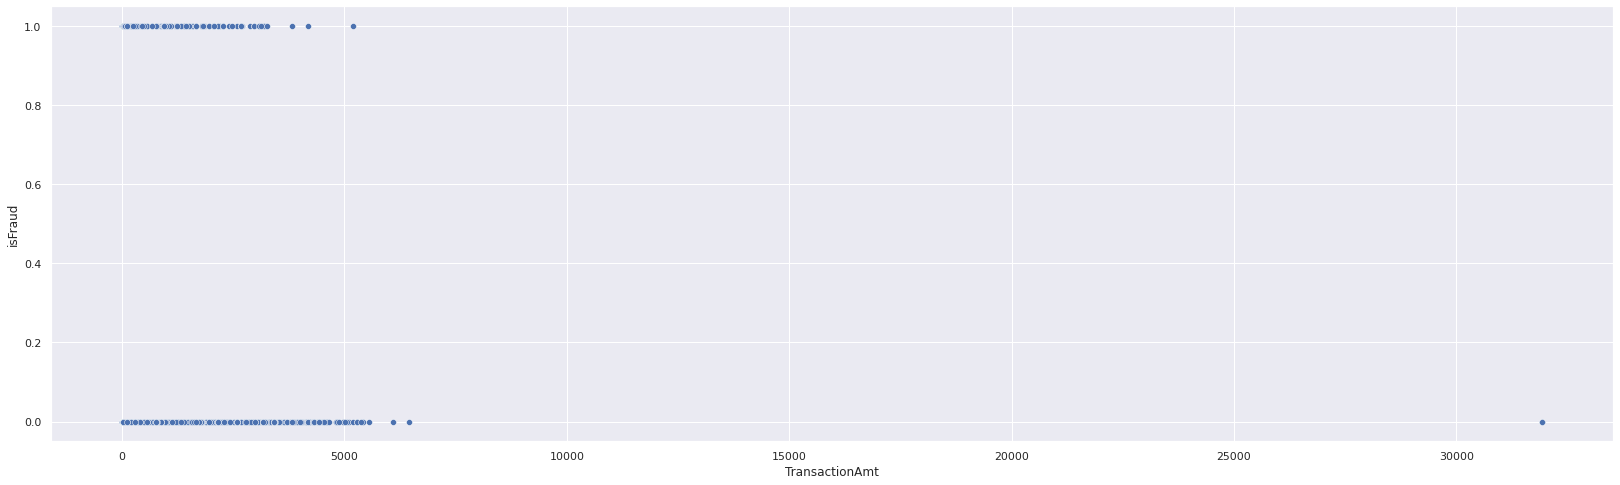

In [ ]:
sns.scatterplot(data=transaction, x='TransactionAmt', y='isFraud')

Можем заметить выброс

Посмотрим распределение используемых доменов для законных и мошеннеческих транзакций:

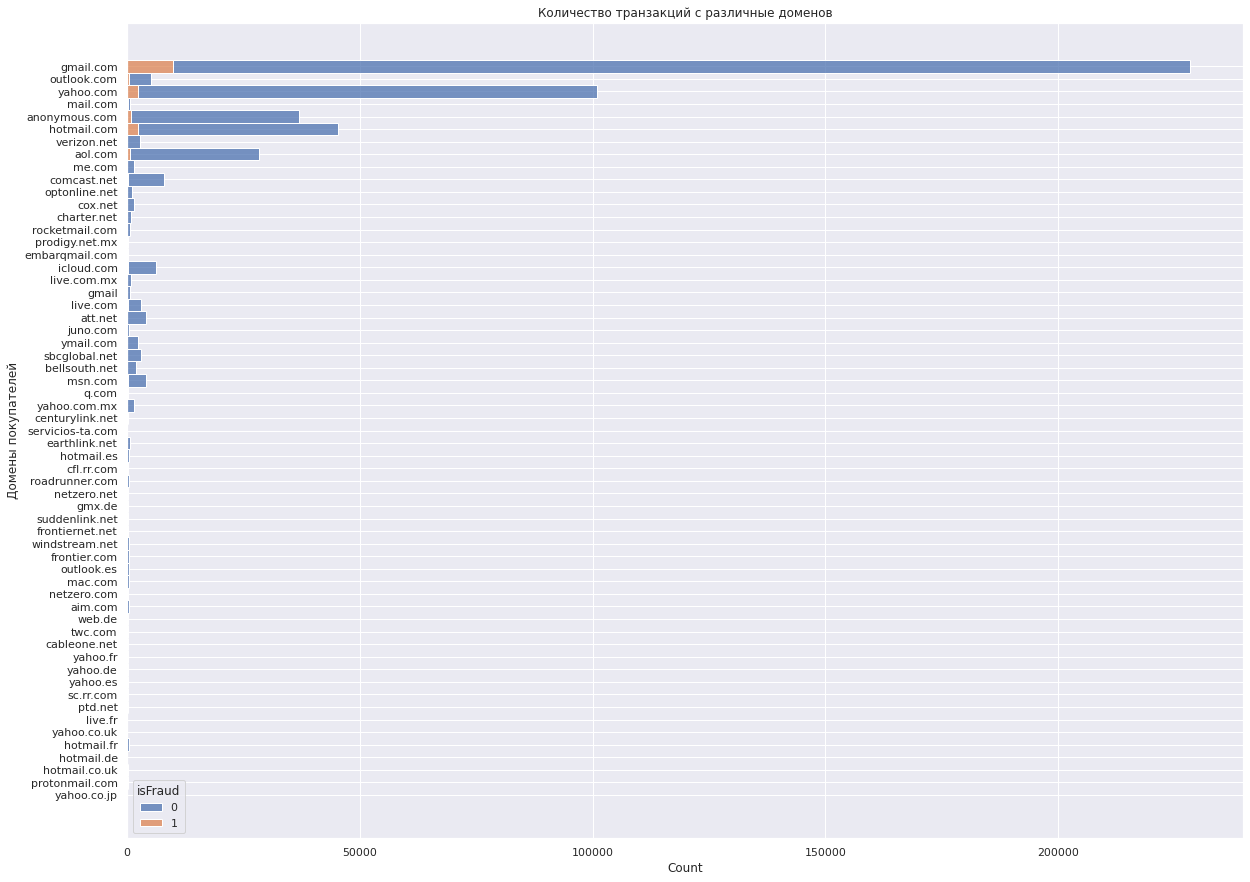

In [ ]:
sns.set(rc={'figure.figsize':(20, 15)})
sns.histplot(data=transaction, y='P_emaildomain', hue='isFraud', multiple="stack").set(ylabel='Домены покупателей', 
                                               title='Количество транзакций с различные доменов');

Вывод: нет каких-либо очевидных признаков, позволяющих заподозрить мошеннеческую транзакцию

###Для таблицы identity

Объединим две таблицы transaction и identity

In [ ]:
merge_df

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.50,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.00,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,3577537,0,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,3577538,0,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


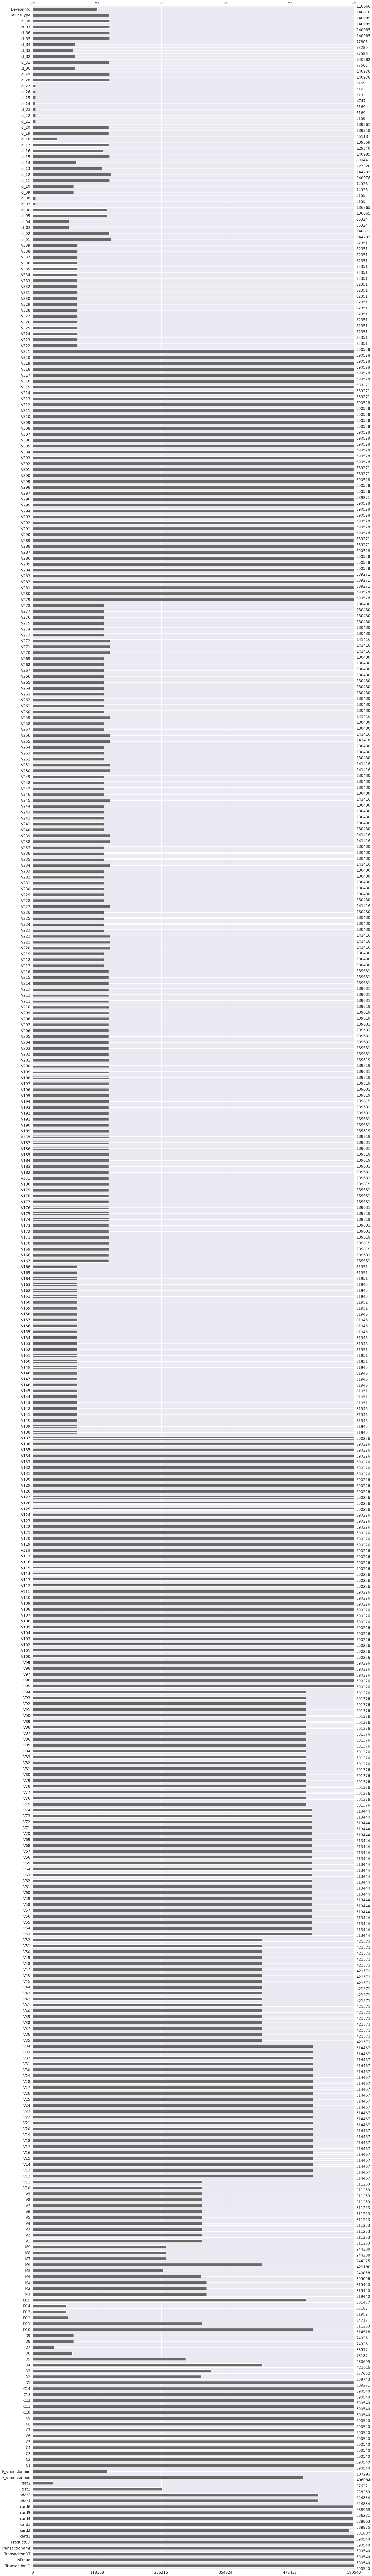

In [ ]:
msno.bar(merge_df)

Посмотрим на количество совершенных транзакция с разных девайсов и их информацией. Посмотрим где чаще всего встречаются мошеннеческий транзакции

In [ ]:
TARGET = 'isFraud'

In [ ]:
def plot_categorical_data(col, data, top_n = 10):
    
    df_data = data[[col, TARGET]].copy() 

    df = df_data.groupby(col).agg({col:['count'], TARGET:['sum']})
    df.columns = ['count', 'fraud_count']

    df['fraud_perc'] = df['fraud_count'] * 100 / df['count']
    df['fraude_perc'] = df['fraud_perc'].round(2)

    null_perc = (df_data.shape[0]- df['count'].sum()) / df_data.shape[0]

    df_disp = df.sort_values(by ='count', ascending= False).head(top_n)

    fig, (ax1, ax2)  =  plt.subplots(ncols = 2, figsize = (20,10))
    fig.suptitle('Plots for {} (Missing Values: {:.2%})'.format(col, null_perc))

    plot_order = df_disp.sort_values(by='count', ascending=False).index.values


    s = sns.barplot(ax = ax1,  y = df_disp.index, x = df_disp['count'], order=plot_order, orient = 'h')
    s.set_title('Count for {}'.format(col))


    s = sns.barplot(ax = ax2,  y = df_disp.index, x = df_disp['fraud_perc'], order=plot_order , orient = 'h')
    s.set(xlabel='Fraud Percent')
    s.set_title('% Fraud {}'.format(col))
    plt.show()
    print("---------------------------------------------------------------------------------------------------------------------")

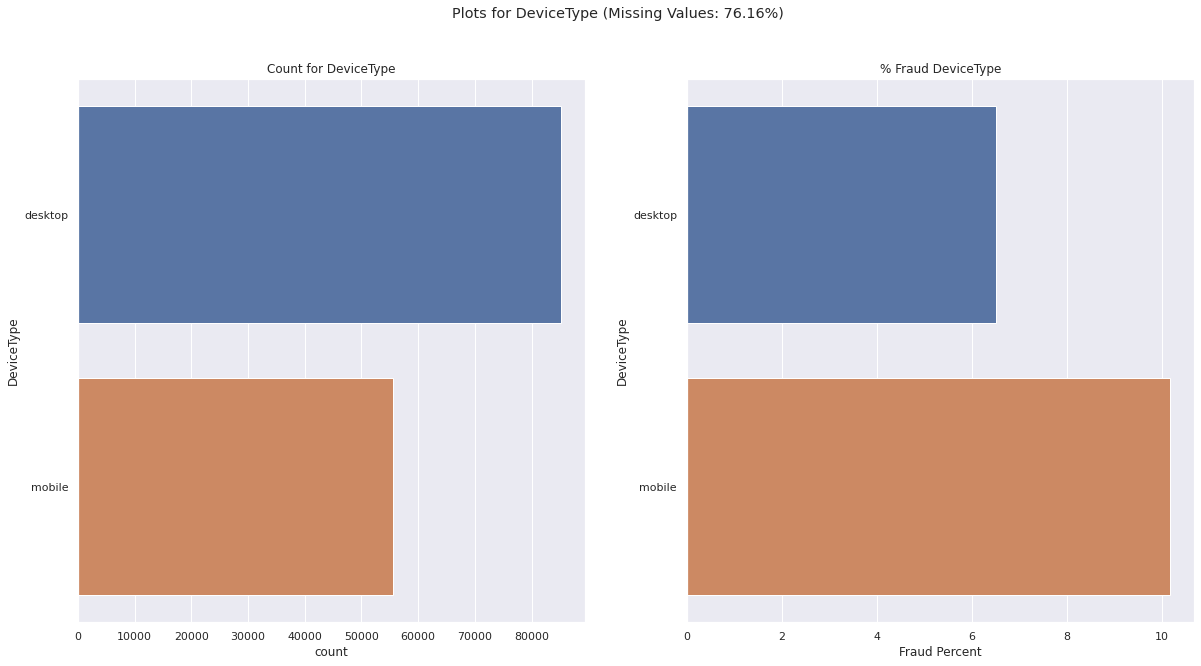

---------------------------------------------------------------------------------------------------------------------


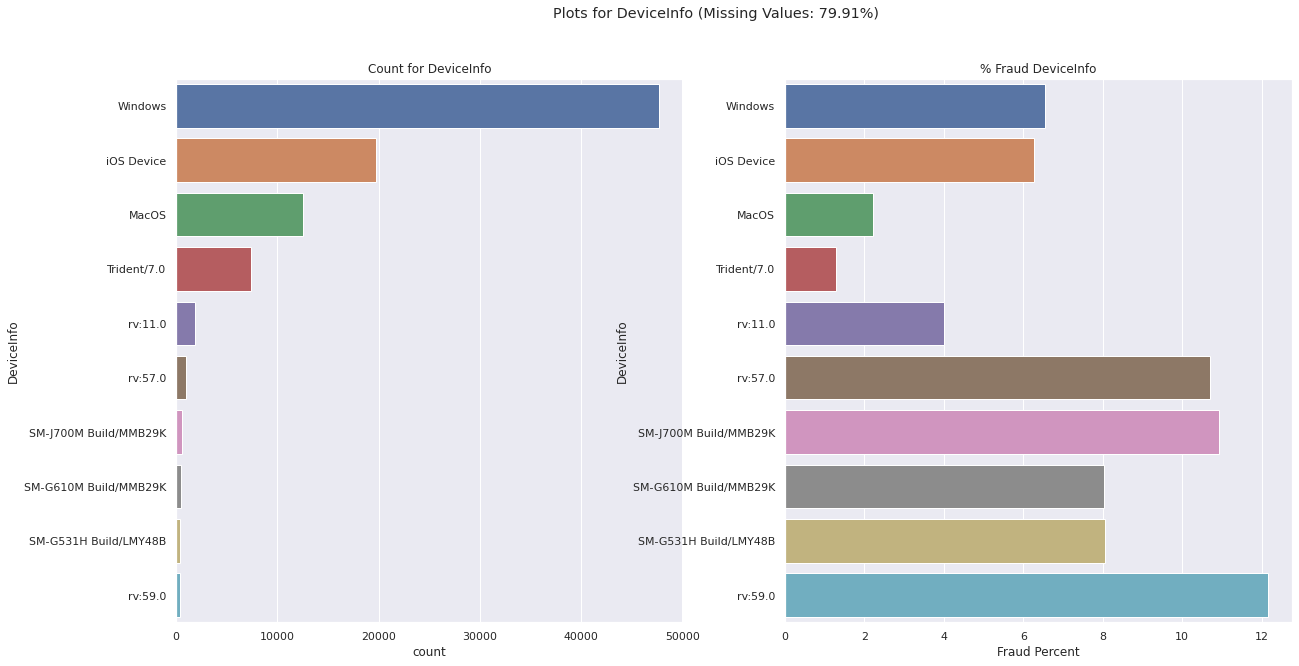

---------------------------------------------------------------------------------------------------------------------


In [ ]:
for col in ["DeviceType", "DeviceInfo"]:    
    plot_categorical_data(col, merge_df, top_n = 10)

Вывод: Самым популярным устройством является компьютер, с ОС Windows. Однако мошейнических транзакций больше совершаются с помощью мобильных устройствах модели RV:59.0

## Оценим взаимосвязь признаков

### Для таблицы transaction

Посчитаем парную корреляцию для каждого признака и выведем таблицу

In [ ]:
# pd.set_option('display.max_columns', None) # если надо посмотреть всю таблицу
# pd.set_option('max_rows', None)
transaction_correl = transaction.corr()
transaction_correl

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
TransactionID,1.000000,0.014166,0.998280,0.012025,0.010122,-0.019900,-0.010091,-0.023900,-0.000370,0.057213,...,0.039737,0.030079,0.042570,0.029283,0.057934,0.056887,0.062927,0.017676,0.053150,0.039573
isFraud,0.014166,1.000000,0.013103,0.011320,-0.013640,0.003388,0.154151,-0.033580,0.005596,-0.030387,...,0.037578,0.041494,0.038535,0.048298,-0.002960,0.005010,0.000997,0.000061,0.004961,0.001677
TransactionDT,0.998280,0.013103,1.000000,0.011920,0.010625,-0.019202,-0.011222,-0.024132,-0.000051,0.051972,...,0.039969,0.029642,0.042646,0.028649,0.060300,0.059212,0.065552,0.018373,0.055153,0.041065
TransactionAmt,0.012025,0.011320,0.011920,1.000000,-0.005725,0.016136,-0.109785,0.003061,-0.007421,0.028312,...,0.107135,0.190256,0.148143,0.176778,0.013058,0.010584,0.013408,0.128373,0.103606,0.120679
card1,0.010122,-0.013640,0.010625,-0.005725,1.000000,0.004960,0.002965,-0.093633,0.020369,-0.000060,...,0.005182,0.001198,0.011300,-0.000089,0.045981,0.050782,0.052013,0.008799,0.036007,0.025620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V317,0.056887,0.005010,0.059212,0.010584,0.050782,0.031893,-0.016353,-0.093863,0.014431,-0.002954,...,0.230368,0.048729,0.187214,0.047055,0.910548,1.000000,0.970185,0.133218,0.592800,0.381356
V318,0.062927,0.000997,0.065552,0.013408,0.052013,0.032740,-0.014949,-0.099139,0.015966,0.001723,...,0.239516,0.054550,0.195329,0.050822,0.938424,0.970185,1.000000,0.144952,0.619716,0.410520
V319,0.017676,0.000061,0.018373,0.128373,0.008799,0.015608,-0.014204,-0.019195,0.005389,0.003700,...,0.063377,0.037804,0.049994,0.031883,0.136290,0.133218,0.144952,1.000000,0.788216,0.921923
V320,0.053150,0.004961,0.055153,0.103606,0.036007,0.030151,-0.023630,-0.067759,0.010651,0.004486,...,0.208406,0.066433,0.164119,0.063852,0.551337,0.592800,0.619716,0.788216,1.000000,0.937500


Можно посмотреть какие признаки имеют корреляцию с признаком 'isFraud' более 0.7

In [ ]:
corr_isFraud = transaction_correl['isFraud']
corr_isFraud[np.abs(corr_isFraud) > 0.7]

isFraud    1.0
Name: isFraud, dtype: float64

Нет никаких сильных парных корреляций для переменной 'isFraud'

Запишем все признаки с сильными корреляциями в файл 'output.txt' (исключая корреляцию признака самим с собой)

Ссылка: https://drive.google.com/file/d/1lw8f_jtq1XGT6SyT6iJ_ax9vAunYGyF0/view?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os

os.chdir("/content/drive/")
with open('/content/drive/My Drive/output.txt','w') as out:
  for row in transaction_correl.index:
    corr_of_row_1 = transaction_correl[row]
    corr_of_row_2 = corr_of_row_1[np.abs(corr_of_row_1) > 0.7]
    indexes = [i for i in list(corr_of_row_2.index) if i != row]
    if len(indexes) == 0:
      continue
    s = str(corr_of_row_2[indexes])
    out.write(s + '\n' + '--' * 10 + '\n')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Построим для некоторых сильно коррелирующих между собой признаков графики рассеяния

Зависимость D4 и D15 (различные timedelta транзакций) для законных и мошеннеческих операций:
* Их корреляция:

In [ ]:
transaction_correl['D4']['D15']

0.7515461031203133

* График рассеяния:

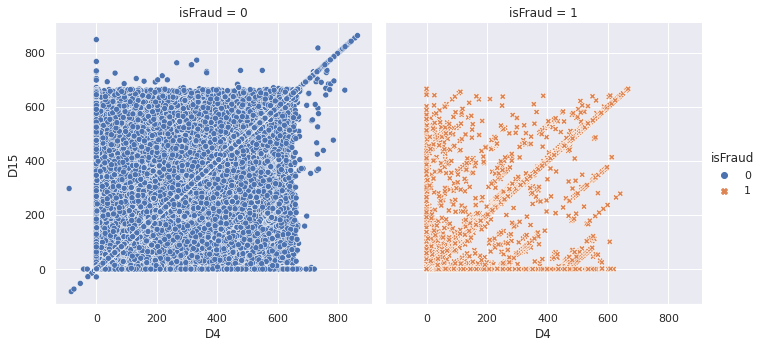

In [ ]:
sns.relplot(
    data=transaction, x="D4", y="D15",
    col="isFraud", hue="isFraud", style="isFraud",
    kind="scatter"
)

Зависимость C1 и C2 (различные подсчеты, например, количество адресов, связанных с платежной картой) для законных и мошеннеческих операций:
* Корреляция:

In [ ]:
transaction_correl['C1']['C2']

0.9950894592234939

* График рассеяния:

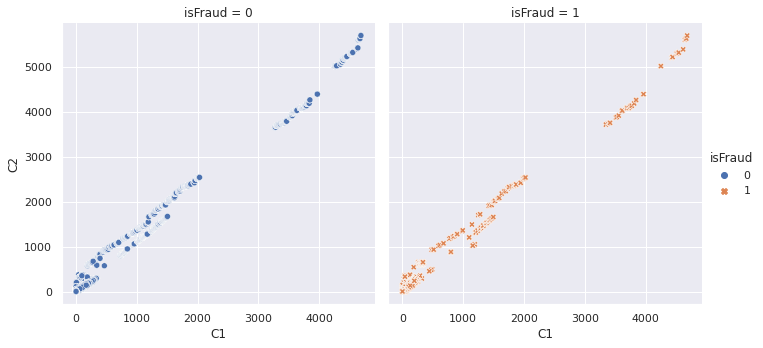

In [ ]:
sns.relplot(
    data=transaction, x="C1", y="C2",
    col="isFraud", hue="isFraud", style="isFraud",
    kind="scatter"
)

Зависимость двух соседних признаков, разработанных компании Vesta (V44 и V45):
* Корреляция

In [ ]:
transaction_correl['V44']['V45']

0.9051006839772934

* График рассеяния:

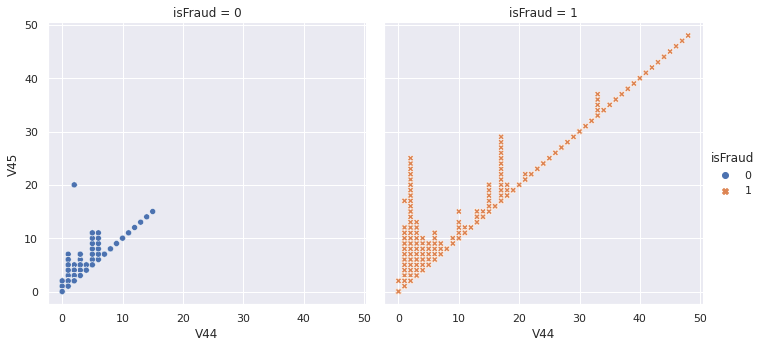

In [ ]:
sns.relplot(
    data=transaction, x="V44", y="V45",
    col="isFraud", hue="isFraud", style="isFraud",
    kind="scatter"
)

Можно заметить, что более высокие значения V44 и V45 соответствуют мошеннеческим транзакциям 

Выводы:

* Нет выраженных корреляция с целевым признаком isFraud
* Наиболее сильно коррелируют между собой признаки из одних подгрупп (C1-C14, D1-D15, V1-V339), особенно соседние в подгруппе



### Для таблицы identity

Добавим в таблицу identity целеевую переменную isFraud^

In [ ]:
to_drop = list(merge_df.columns)[2:226]
identity_with_isFraud = merge_df.drop(to_drop, axis=1)

Построим таблицу корреляций

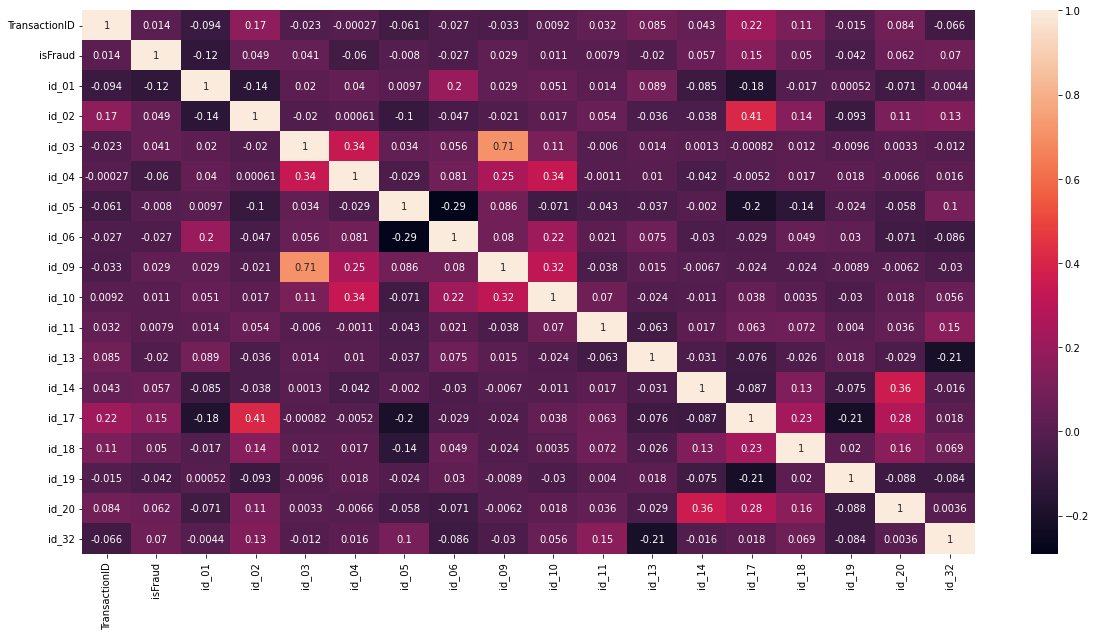

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(identity_with_isFraud.corr(), annot = True)
plt.show()

Наиболее зависимыми переменными оказались признаки ID_09 и ID_03

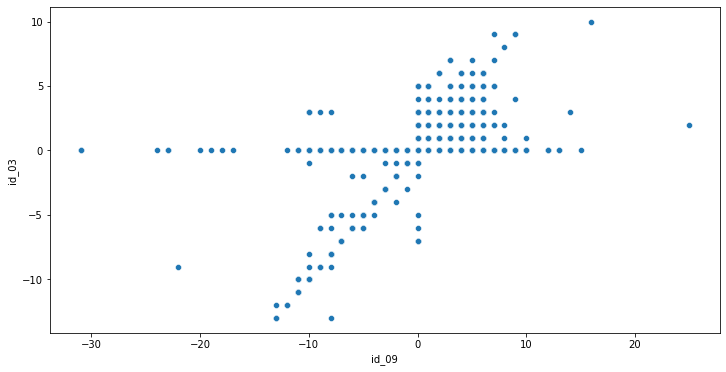

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
sns.scatterplot(x = df_identity["id_09"], y = df_identity["id_03"])
plt.show()

Можно заметить такую зависимость - чем больше ID_09, тем больше ID_03 и наоборот

# Выводы:


* Данные сильно несбалансированы по целевой переменной isFraud, что в будущем может создать сложность с правильным оцениванием качества моделей

* Нет никаких сильно коррелирующих признаков с целевой переменной, однако мы обнаружили, что наибольшее число мошеннических транзакций совершаются с помощью мобильных устройствах модели RV:59.0. Также имеется много признаков из одних подгрупп, сильно связанных между собой (из подгруппы С, D, V и id). В дальнейшем, при отборе признаков, возможно будет логично использовать методы уменьшения размерности наподобие PCA.

* Также имеется много пропущенных значени, которые могут быть как результатом отсутствия сбора некоторой информации, так и ее некорректного отражения при выгрузке. 

  Рассмотрим столбцы, имеющие 44% пропусков и более. 
Среди них можно выделить группы M (M1-M5, M7-M9), D (D2,D3,D5,D11), V (V1-V11), dist1.
  
  Группа столбцов M - категориальные признаки, от 45% до 59% пропусков, в основном содержат True/False (кроме М4 - заполненные значения которого содержат М0,M1,M2)
  
  Столбцы D - timedelda; в столбцах медиана сильно отличается от среднего, можно заполнить медианой 
  
  dist1 - расстояния, 59% пропусков, как и в столбцах D присутствует большой разброс в значениях, медиана сильно отличается от среднего, можно заполнить медианой.
  
  Столбцы V - числовые, 47% пропусков, можно заполнить наиболее часто встречающимся значением или каким-то уникальным значением
  * V1 - в основном заполнен 1 (311236 значений и 17 строк заполнено 0, оставшееся - пропуски)
  * V2, V8, V9 - значения от 0 до 8
  * V3, V6, V7 - значения от 0 до 9
  * V4, V5 - значения от 0 до 6
  * V10 - значения от 0 до 4 
  * V11 - значения от 0 до 5

  Возможно указанные столбцы (с 44%+ пропусков) следует удалить полностью (т.к. иначе придется заполнять половину значений)

* С помощью построения графиков распределения и ящика с усами для каждой числовой переменной, мы обнаружили в данных много выбросов, которые в будущем будет также необходимо обработать

* Есть несколько способов объединения двух таблиц, каждый из которых имеет свои плюсы и минусы. При объединени с удалением необщих данных, произойдет потеря более 400 000 транзакций, при замене отсутствующих значений на пропуски - увеличение процента пропущенных значений, что может привести к удалению еще больших числа признаков. Если мы используем способом объединения с присоединением к файлу transaction файла identity, так, чтобы недостающие значения из второго файла были заменены на пропущенные, то почти все признаки из файла identity становятся заполнены пропусками - таким образом мы теряем много признаков.

# Проблемы и вопросы

* Только для 144 233 из 590 540 транзакций есть информация об идентити. При объединении и последущей повторной обработке пропущенных значений может потеряться большая часть данных айдентити. Как лучше стоит объединять две таблицы?
* Как лучше обработать оставшиеся пропуски?
* Стоит ли просто удалить все выбросы?